In [5]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [202]:
sns.axes_style() # посмотреть параметры стиля

# поменять параметры и задать этот стиль для всех графиков
sns.set_style("white") 

---

In [7]:
# https://www.kaggle.com/kingabzpro/heart-disease-patients - описание переменных см здесь
heart = pd.read_csv('../data/heart_disease_patients.csv')
heart.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [116]:
heart['sex'] = heart['sex'].astype(str)
heart['chestpaintype'] = heart['cp'].astype(str)
heart['fastingbldsgr'] = heart['fbs'].astype(str)
heart['restecg'] = heart['restecg'].astype(str)
heart['exang'] = heart['exang'].astype(str)
heart['slope'] = heart['slope'].astype(str)
heart['sex_str'] = heart.sex.apply(lambda x: 'M' if x == '1' else 'F')

heart_num = heart.drop(['sex', 'chestpaintype', 'fastingbldsgr', 'restecg', 'exang', 'cp', 'fbs', 'slope', 'id'], axis=1)
heart_cat = heart[['sex', 'chestpaintype', 'fastingbldsgr', 'restecg', 'exang', 'slope']]

In [117]:
heart_num.head()

,age,trestbps,chol,thalach,oldpeak,sex_str
0,63,145,233,150,2.3,M
1,67,160,286,108,1.5,M
2,67,120,229,129,2.6,M
3,37,130,250,187,3.5,M
4,41,130,204,172,1.4,F


In [118]:
heart_cat.head()

,sex,chestpaintype,fastingbldsgr,restecg,exang,slope
0,1,1,1,2,0,3
1,1,4,0,2,1,2
2,1,4,0,2,1,2
3,1,3,0,0,0,3
4,0,2,0,2,0,1


<AxesSubplot: xlabel='sex_str', ylabel='count'>

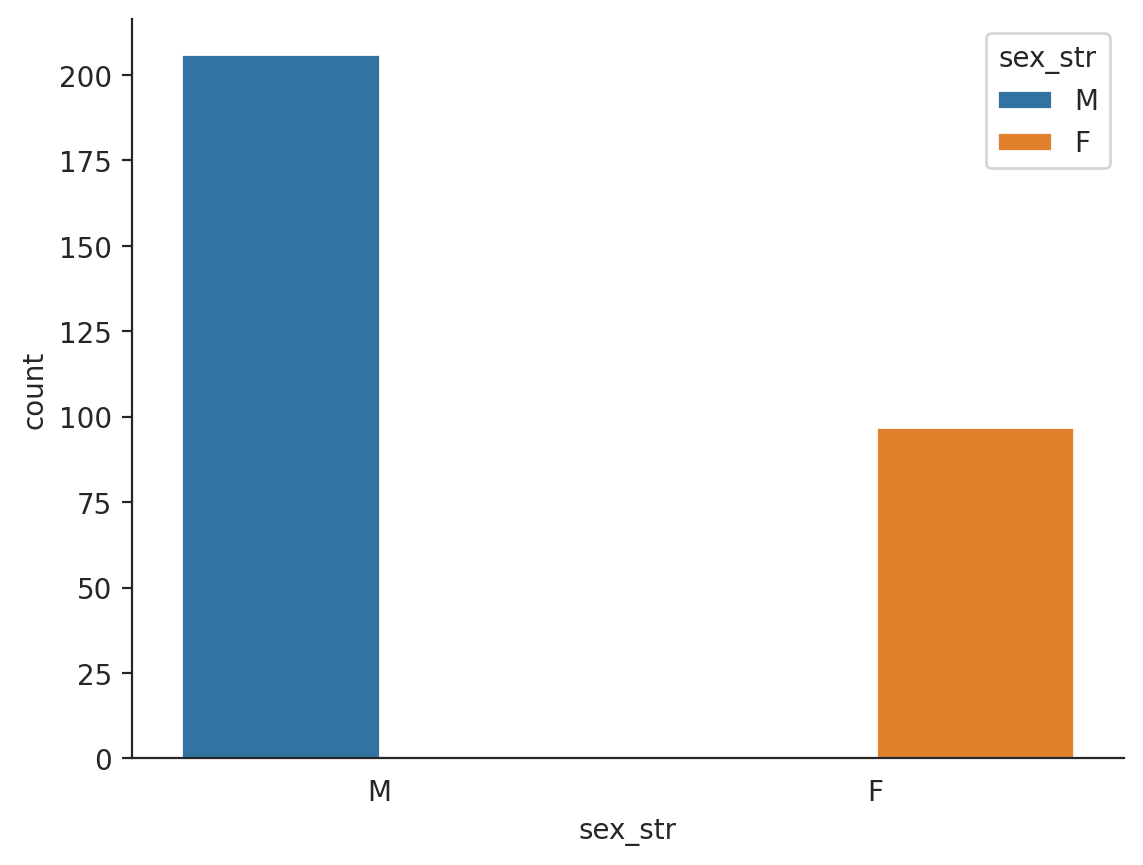

In [119]:
# 1. сколько мужчин и сколько женщин в датасете?
sns.countplot(x='sex_str', data=heart, hue='sex_str')

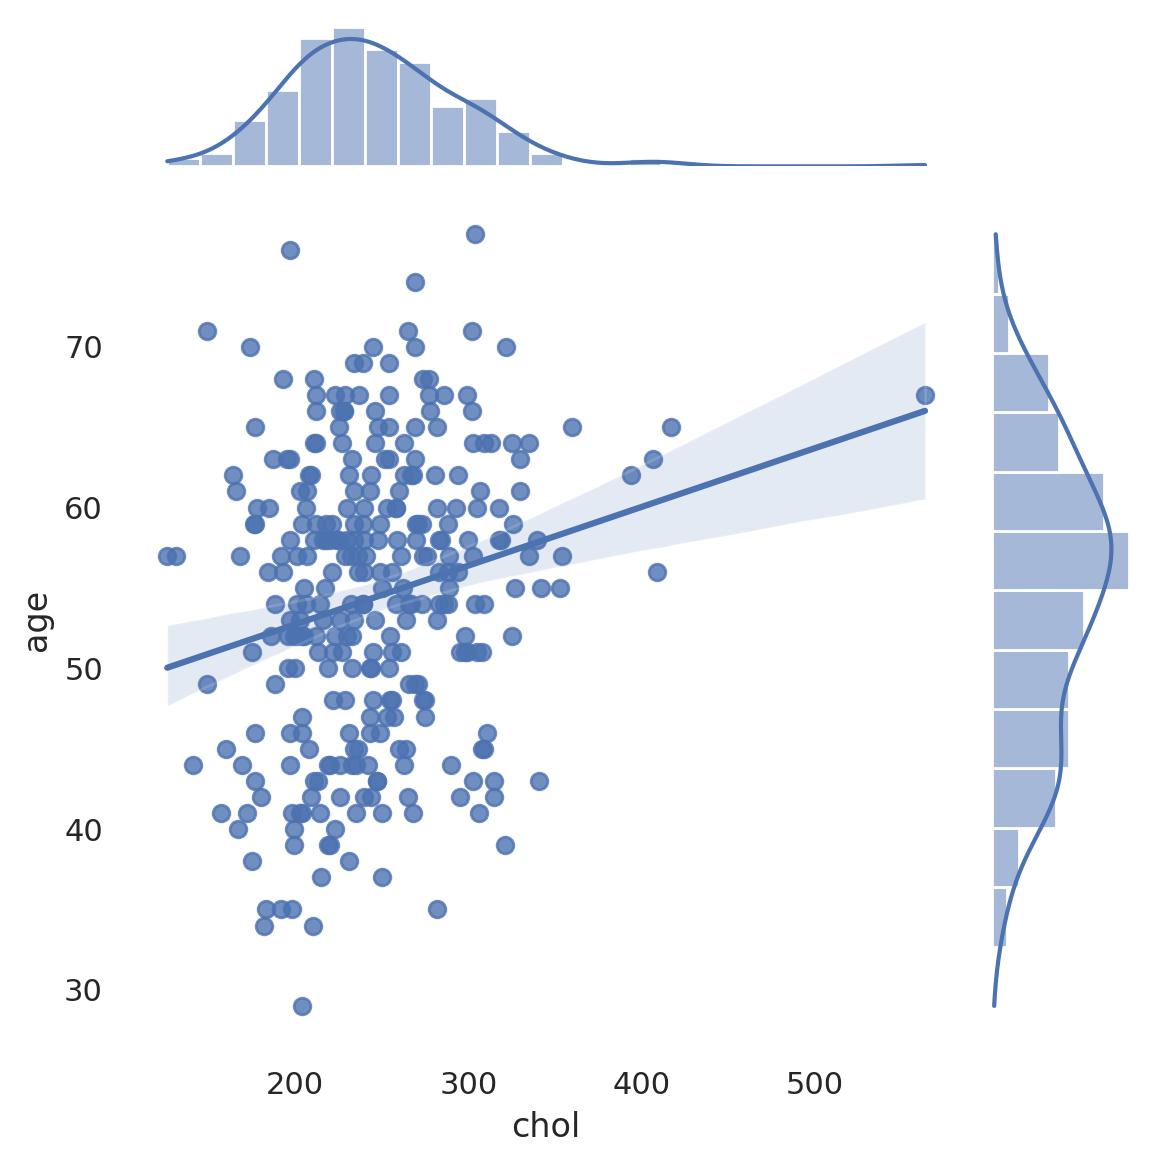

In [326]:
# 2. как связано значение холестерола и возраст?
sns.jointplot(x=heart['chol'],y=heart['age'], kind='reg',);
sns.despine(bottom = True, left = True, right=True, top=True)

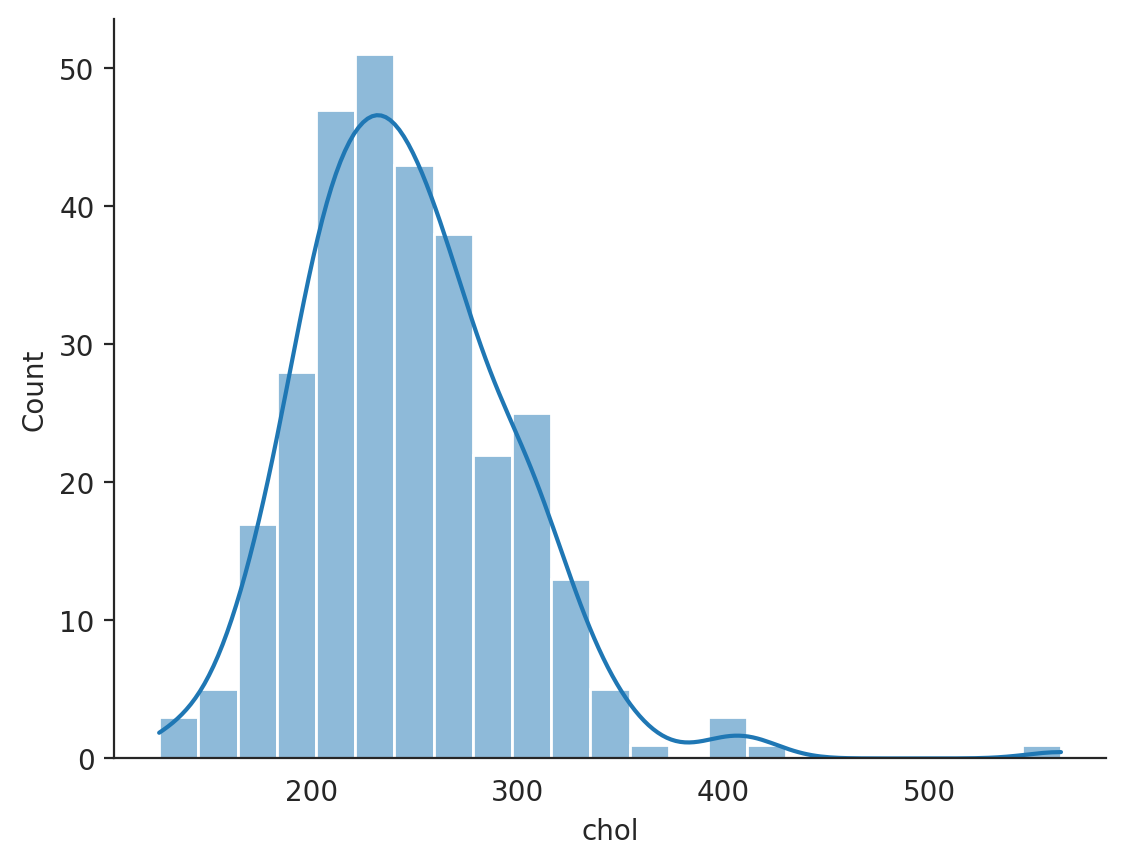

In [121]:
# 3. как распределена переменная chol?
sns.histplot(heart['chol'], kde=True);

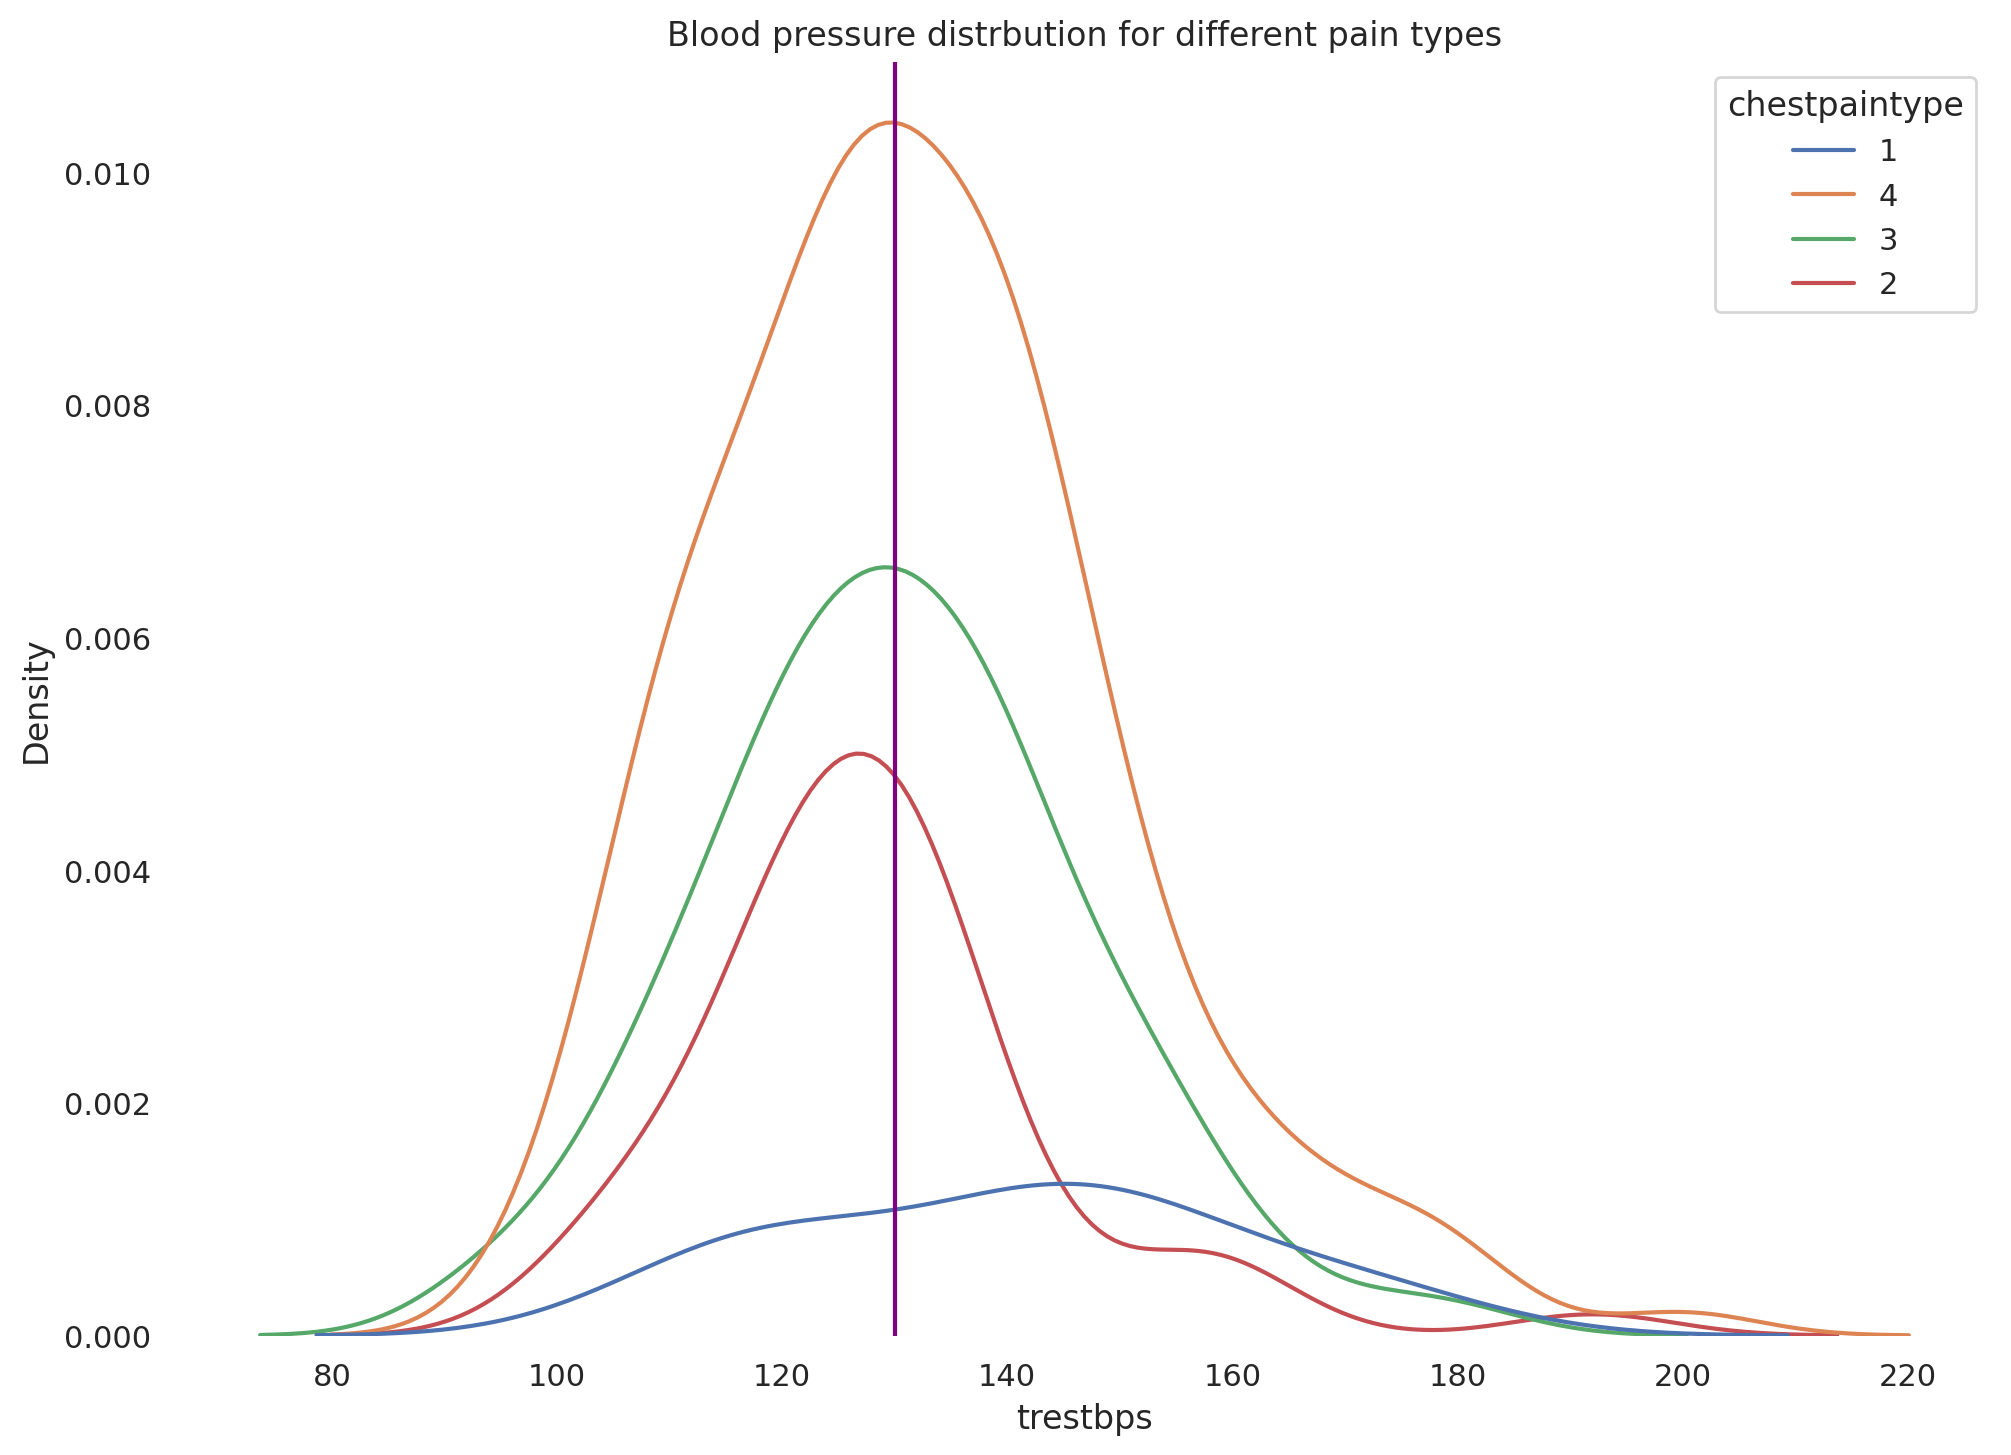

In [341]:
# 4. сравните медианный уровень/распределение показателей давления у людей с разным типом боли
sns.kdeplot(data=heart, x='trestbps', hue='chestpaintype',);
plt.axvline(x=heart.trestbps.median(),
            color='purple')
plt.title("Blood pressure distrbution for different pain types")
sns.despine(bottom = True, left = True, right=True, top=True)

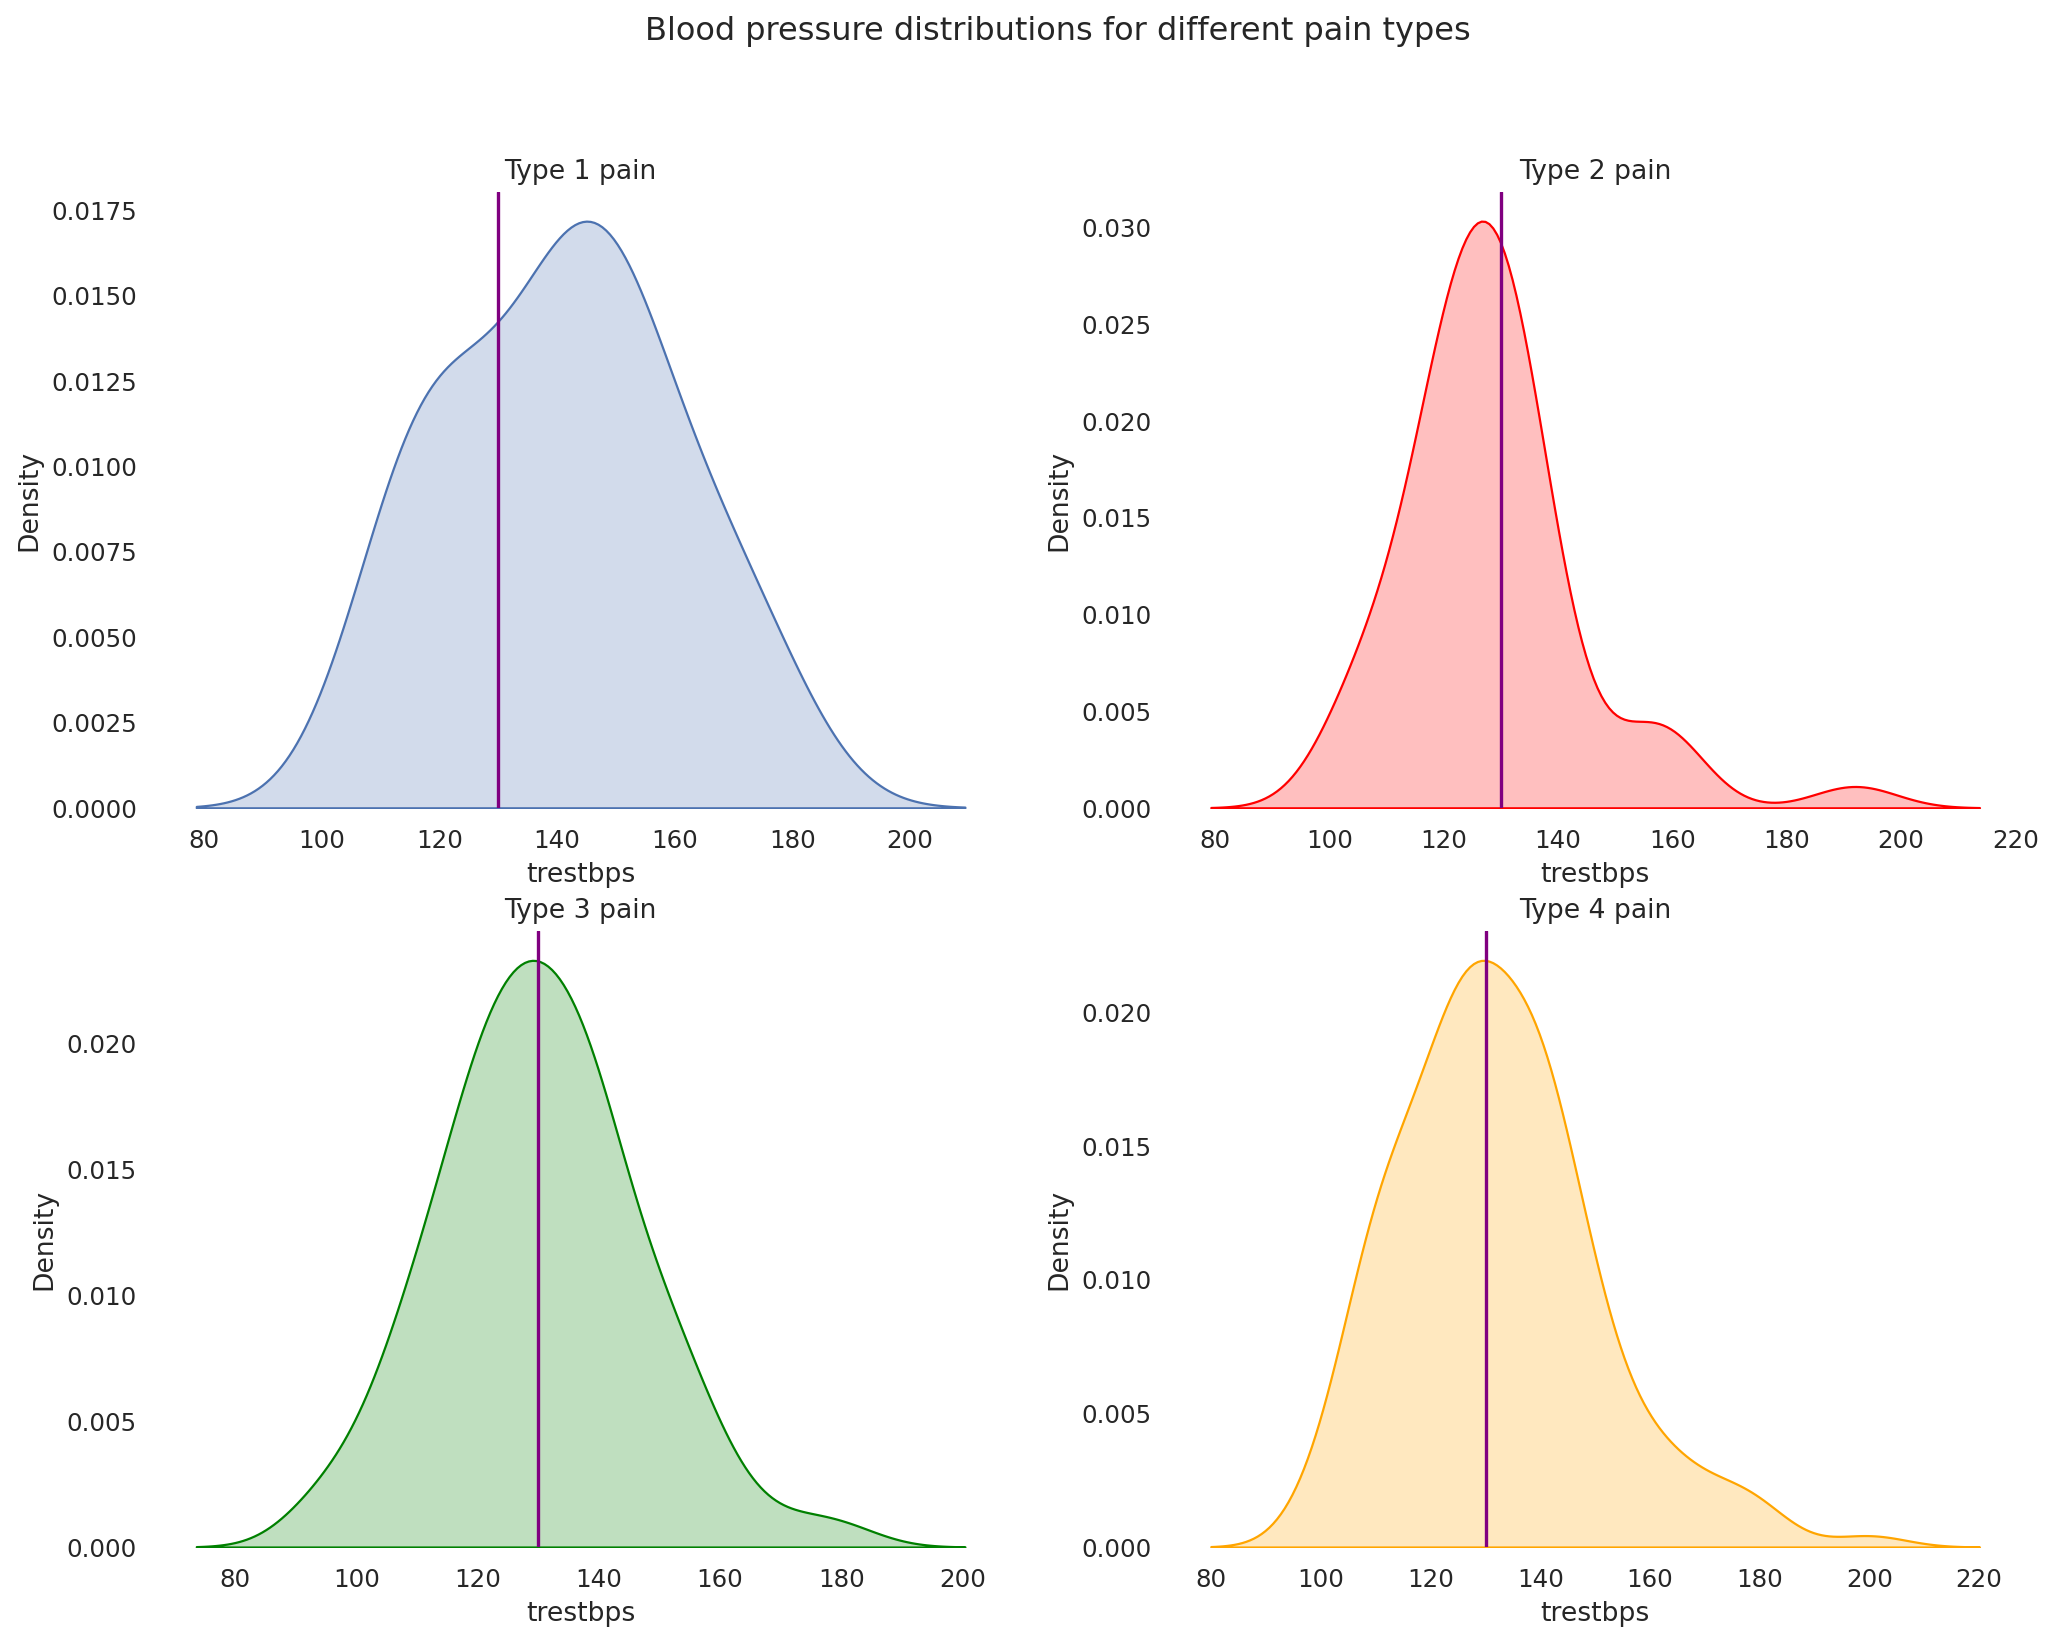

In [403]:
# теперь эти два графика рядом
fig, axs = plt.subplots(2, 2, figsize=(15, 11), dpi=80)

fig.suptitle("Blood pressure distributions for different pain types")

sns.kdeplot(heart[heart.chestpaintype == '1']['trestbps'], ax=axs[0][0], fill=True);
sns.kdeplot(heart[heart.chestpaintype == '2']['trestbps'], ax=axs[0][1], fill=True, color='red');
sns.kdeplot(heart[heart.chestpaintype == '3']['trestbps'], ax=axs[1][0], fill=True, color='green');
sns.kdeplot(heart[heart.chestpaintype == '4']['trestbps'], ax=axs[1][1], fill=True, color='orange');

axs[0][0].axvline(x=heart.trestbps.median(),color='purple')
axs[0][1].axvline(x=heart.trestbps.median(),color='purple')
axs[1][0].axvline(x=heart.trestbps.median(),color='purple')
axs[1][1].axvline(x=heart.trestbps.median(),color='purple')

axs[0][0].set_title('Type 1 pain')
axs[0][1].set_title('Type 2 pain')
axs[1][0].set_title('Type 3 pain')
axs[1][1].set_title('Type 4 pain')


sns.despine(bottom = True, left = True, right=True, top=True)
plt.show()

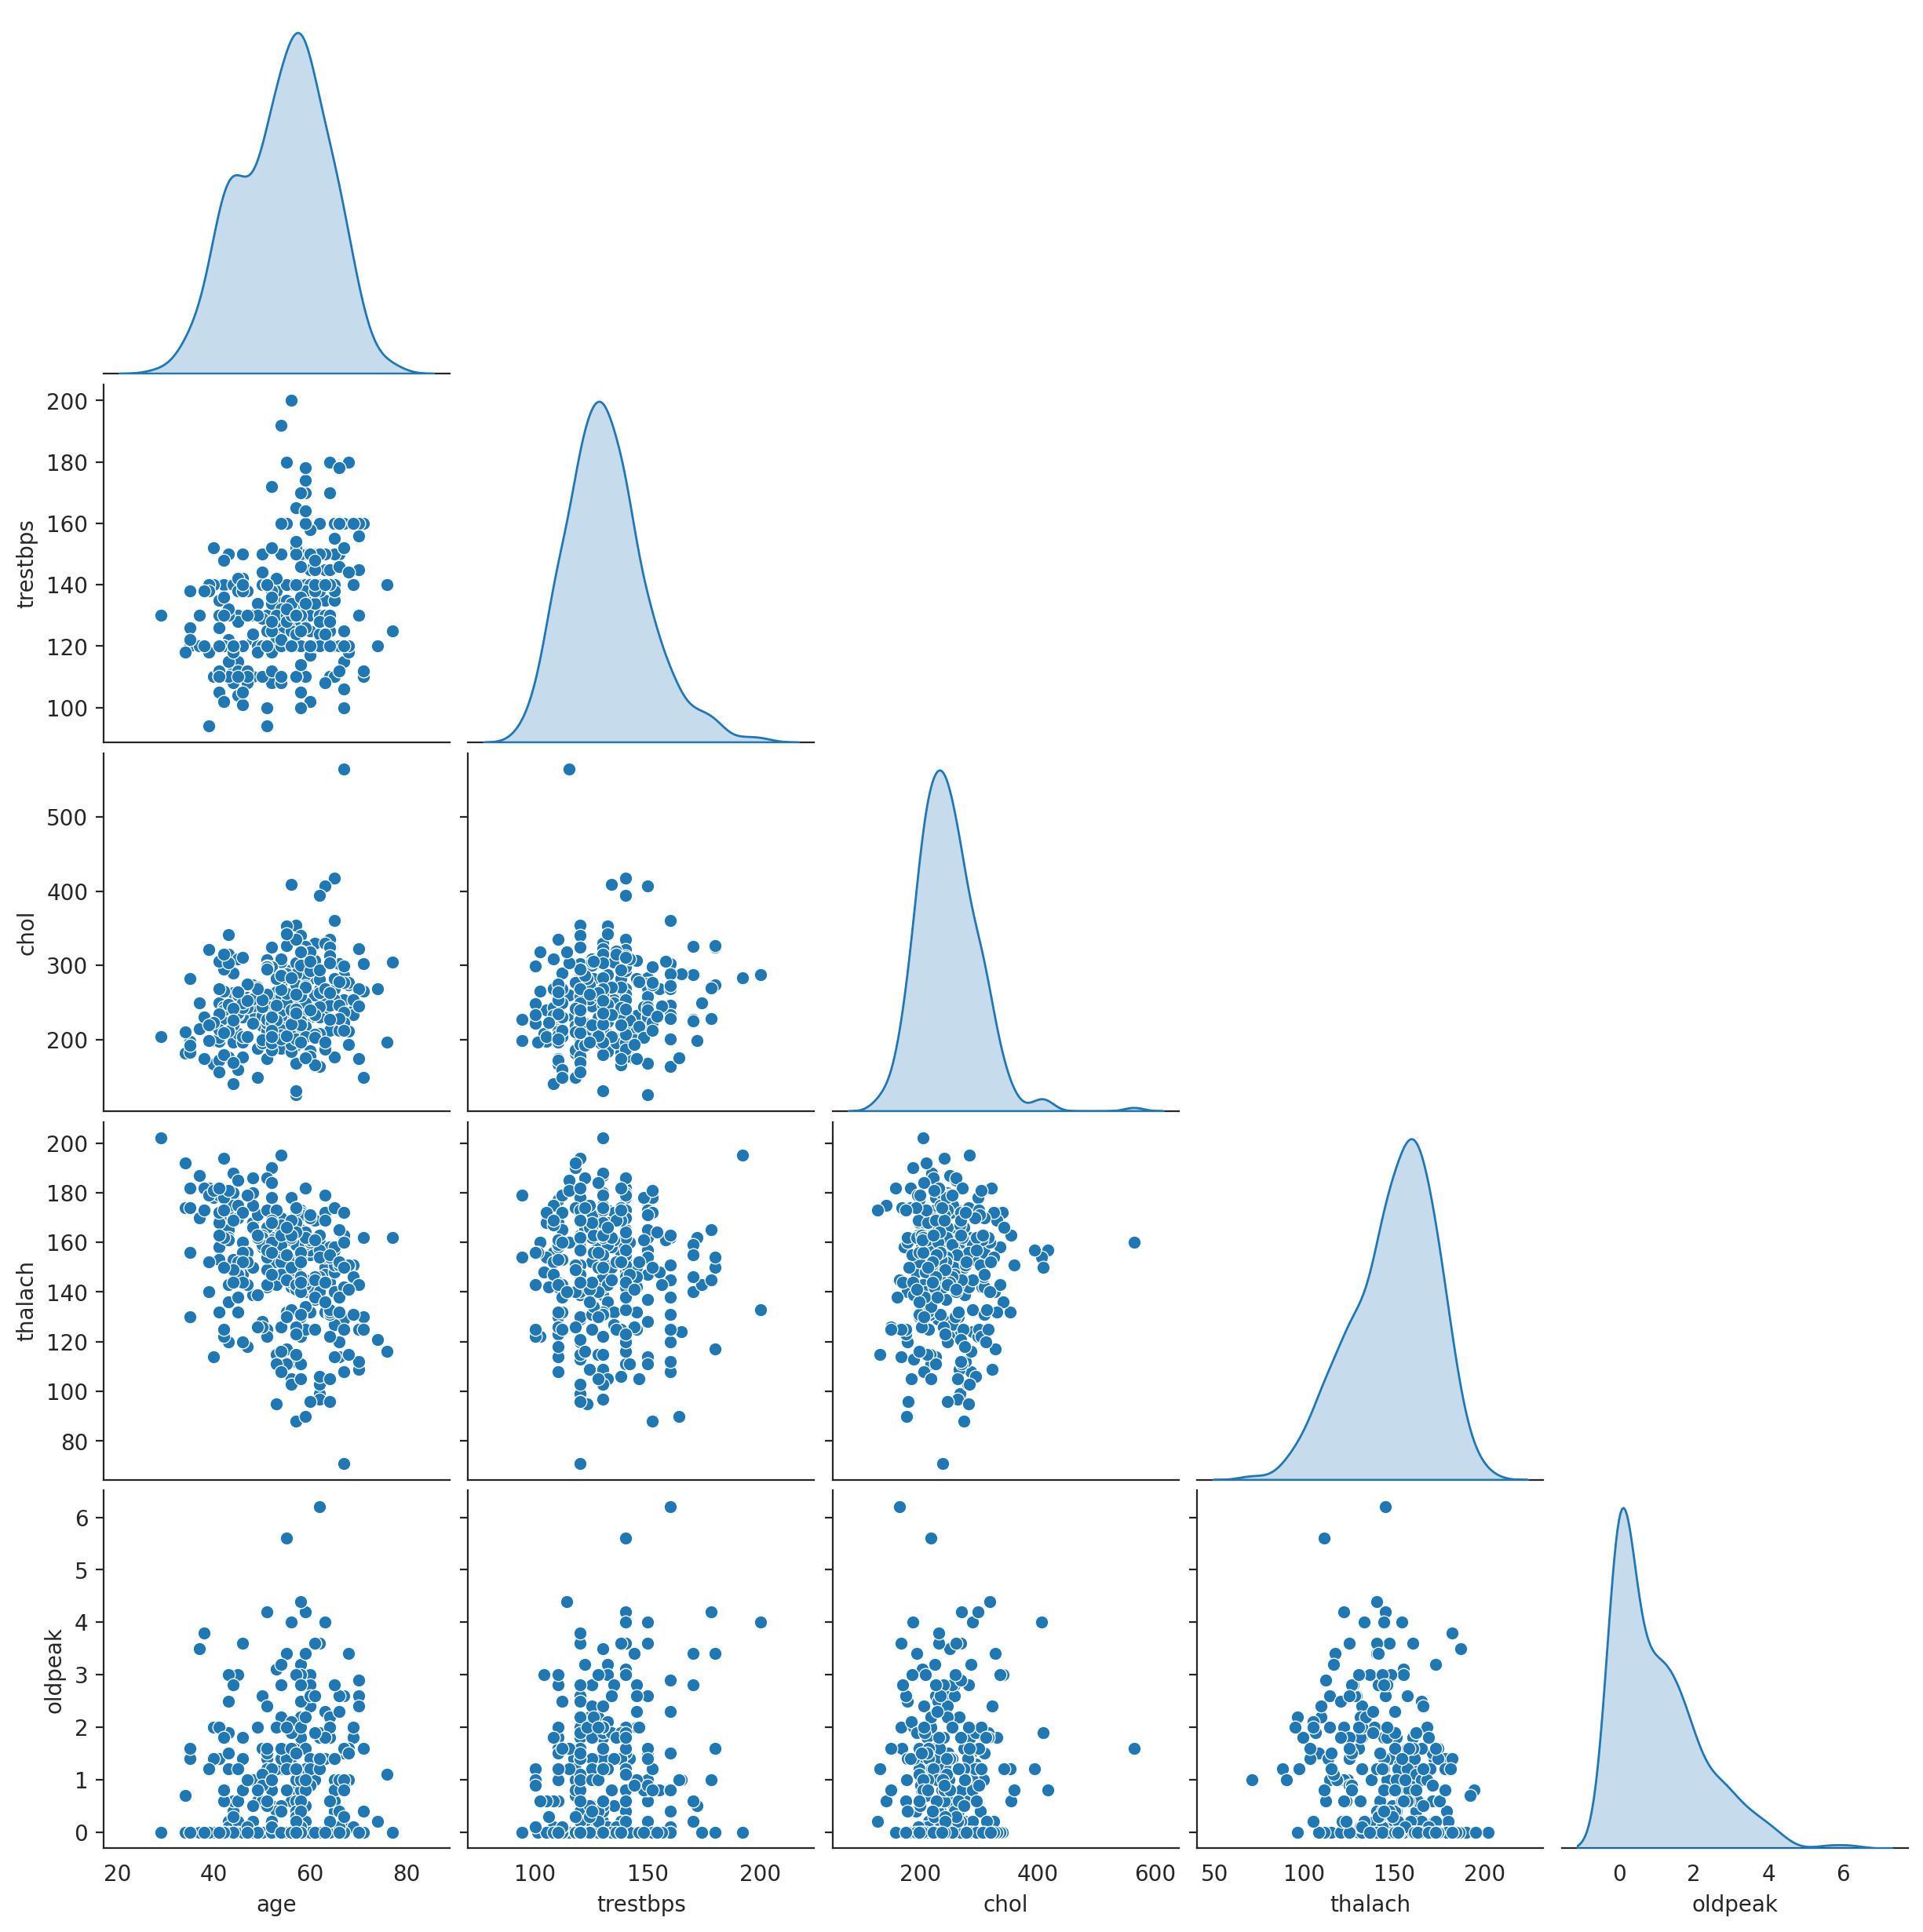

In [124]:
# 5. pairplot по числовым переменным
sns.pairplot(heart_num, kind='scatter', diag_kind='kde', corner=True);

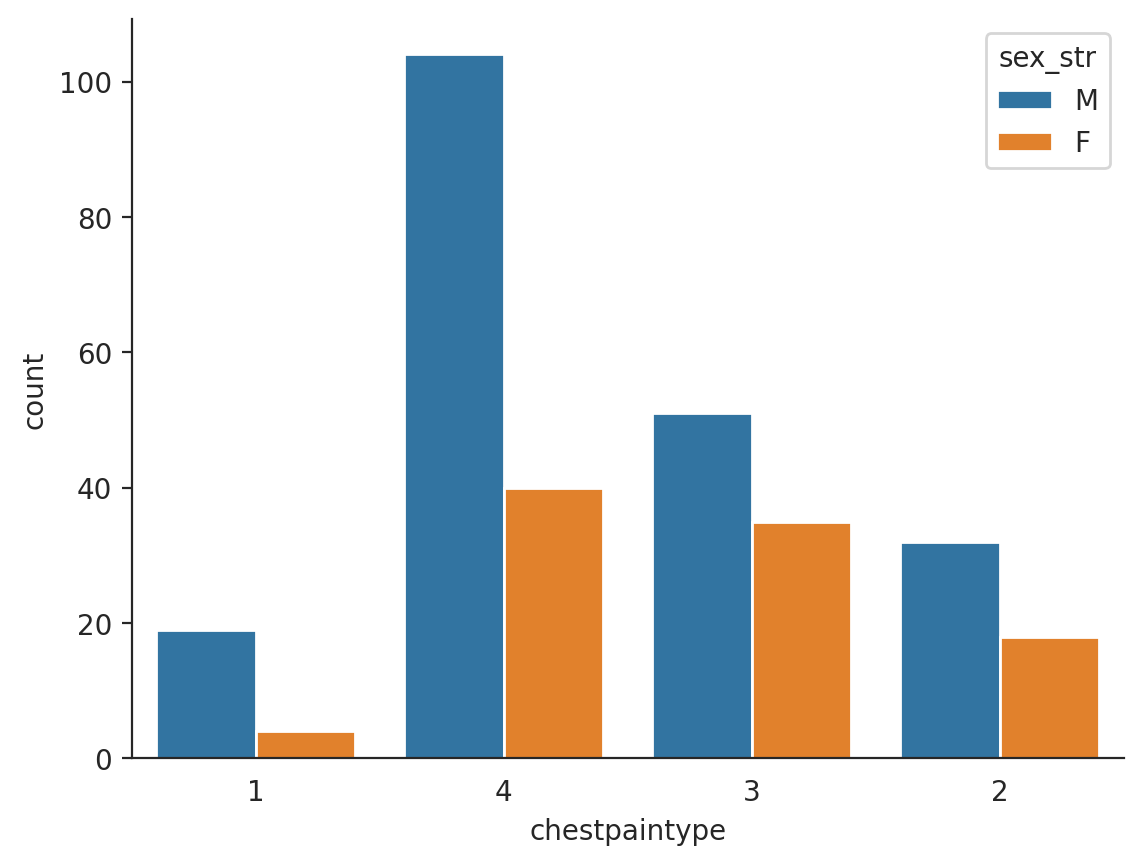

In [53]:
# 6. какой тип боли чаще всего испытывают пациенты? Покажите мужчин и женщин по отдельности
sns.countplot(x='chestpaintype', data=heart, hue='sex_str');

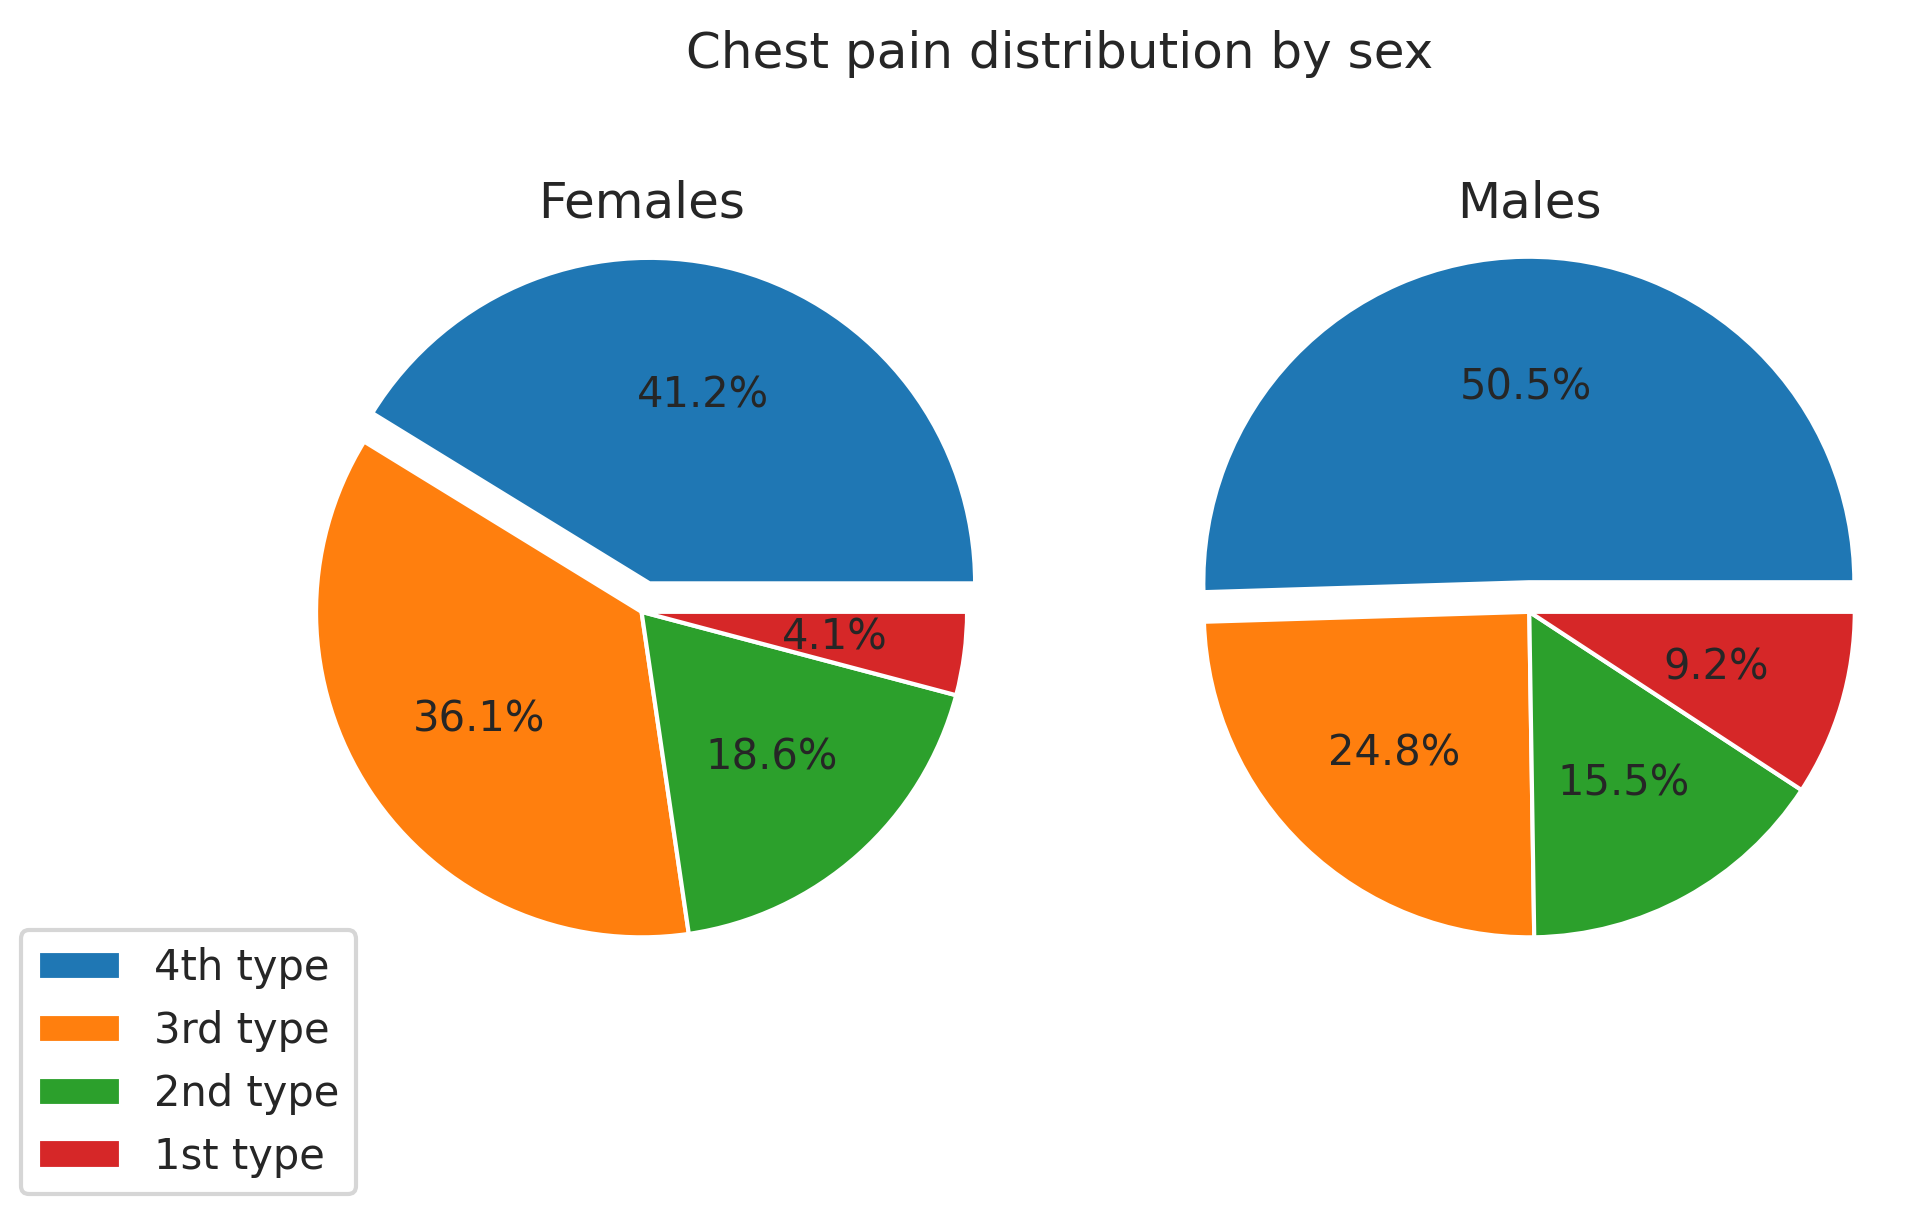

In [144]:
# 7. покажите какой тип боли чаще всего испытывают женщины и мужчины на разных графиках
male_data = heart[heart.sex_str == 'M'].chestpaintype.value_counts()
female_data = heart[heart.sex_str == 'F'].chestpaintype.value_counts()

labels = ['4th type', '3rd type', '2nd type', '1st type']
explode = [0.1, 0, 0, 0]

fig = plt.figure(figsize=(7,4),dpi=150)
fig.suptitle("Chest pain distribution by sex")

ax = fig.add_subplot(121)

ax.title.set_text("Females")
ax.pie(female_data, autopct='%.1f%%', radius=1.1, explode=explode)

ax = fig.add_subplot(122)

ax.title.set_text("Males")
ax.pie(male_data, autopct='%.1f%%', radius=1.1, explode=explode)

fig.legend(labels, loc='lower left')
plt.show()

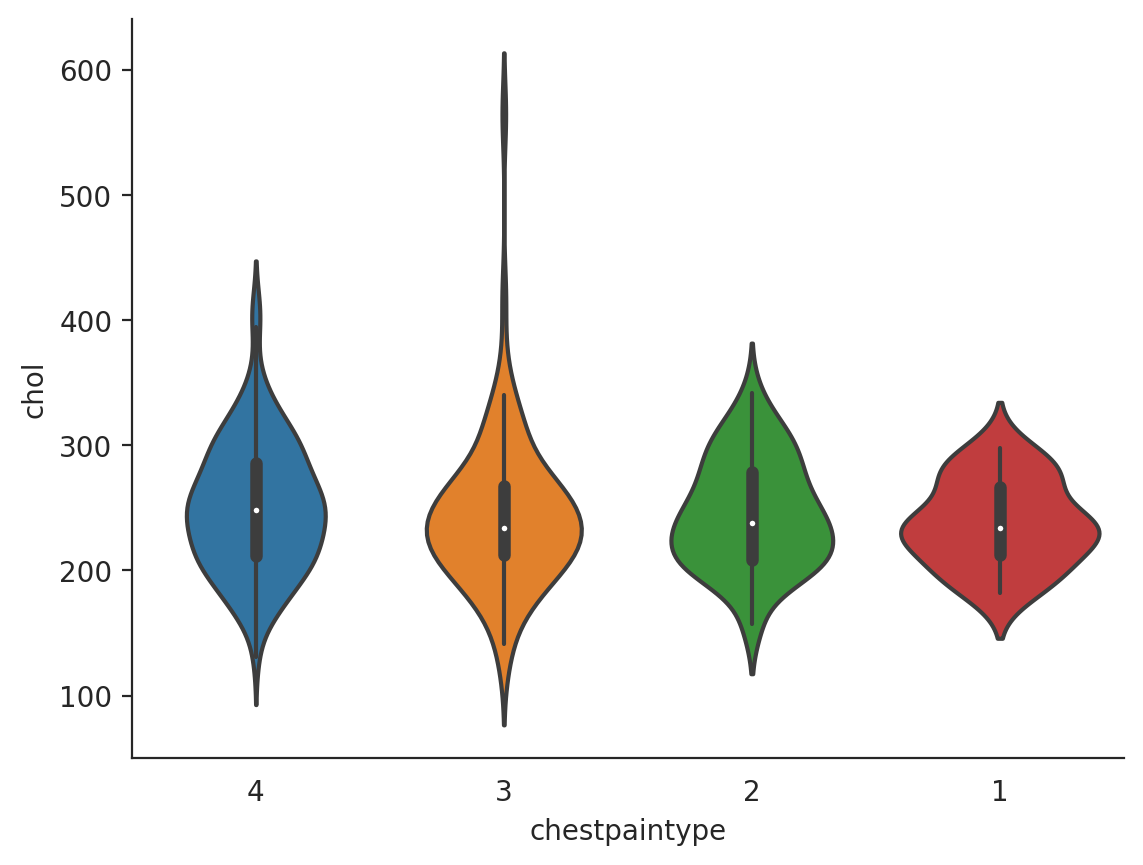

In [142]:
# chestpaintype - cholesterol distribution
sns.violinplot(x='chestpaintype', y='chol', data=heart, order=heart.chestpaintype.value_counts().index);

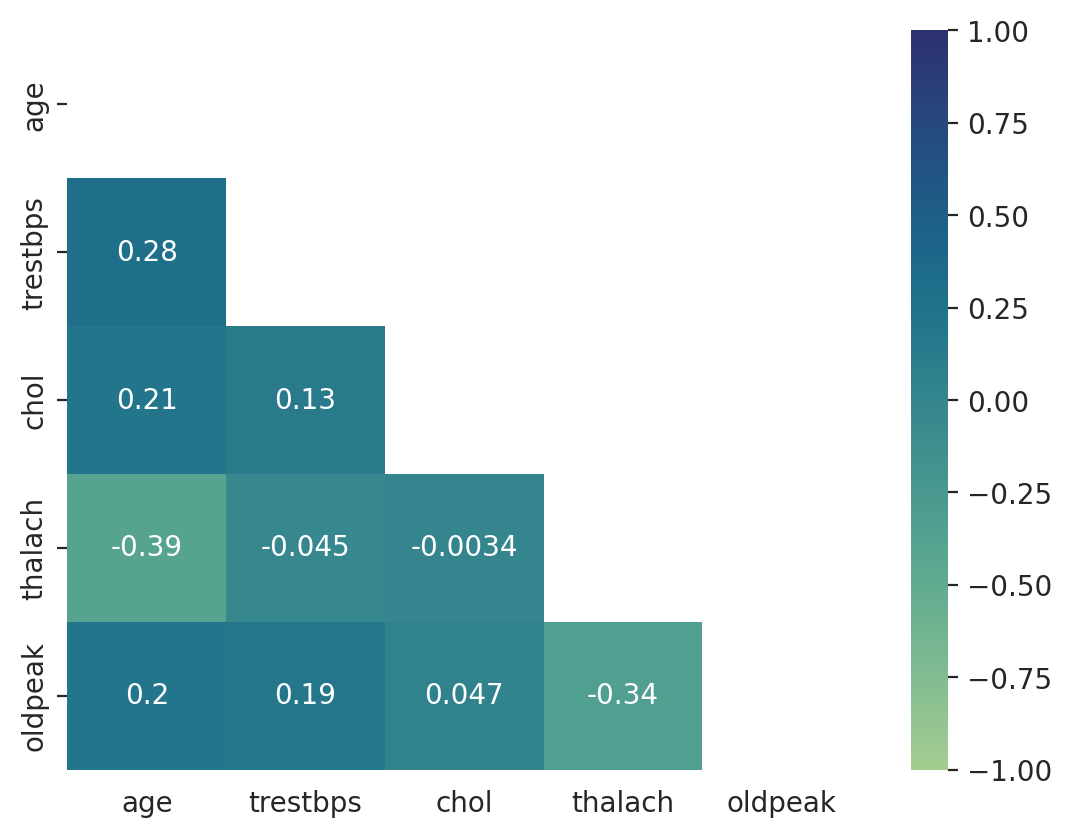

In [127]:
# 8. heatmap
mask = np.zeros_like(heart_num.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heart_num.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap='crest');

---

Познакомьтесь с данными, используя визуализацию.

Не всё в EDA требует визуализации, поэтому можно включить сюда же любой другой анализ, какой вам хочется и кажется полезным - с графиками или без. Поскольку это EDA, то особую красоту наводить не понадобится, но постарайтесь оформить графики по рекомендациям, которые мы прошли на уроке.

In [146]:
# https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data_first150k.csv
wine = pd.read_csv('../data/winemag-data_first150k.csv')

In [149]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


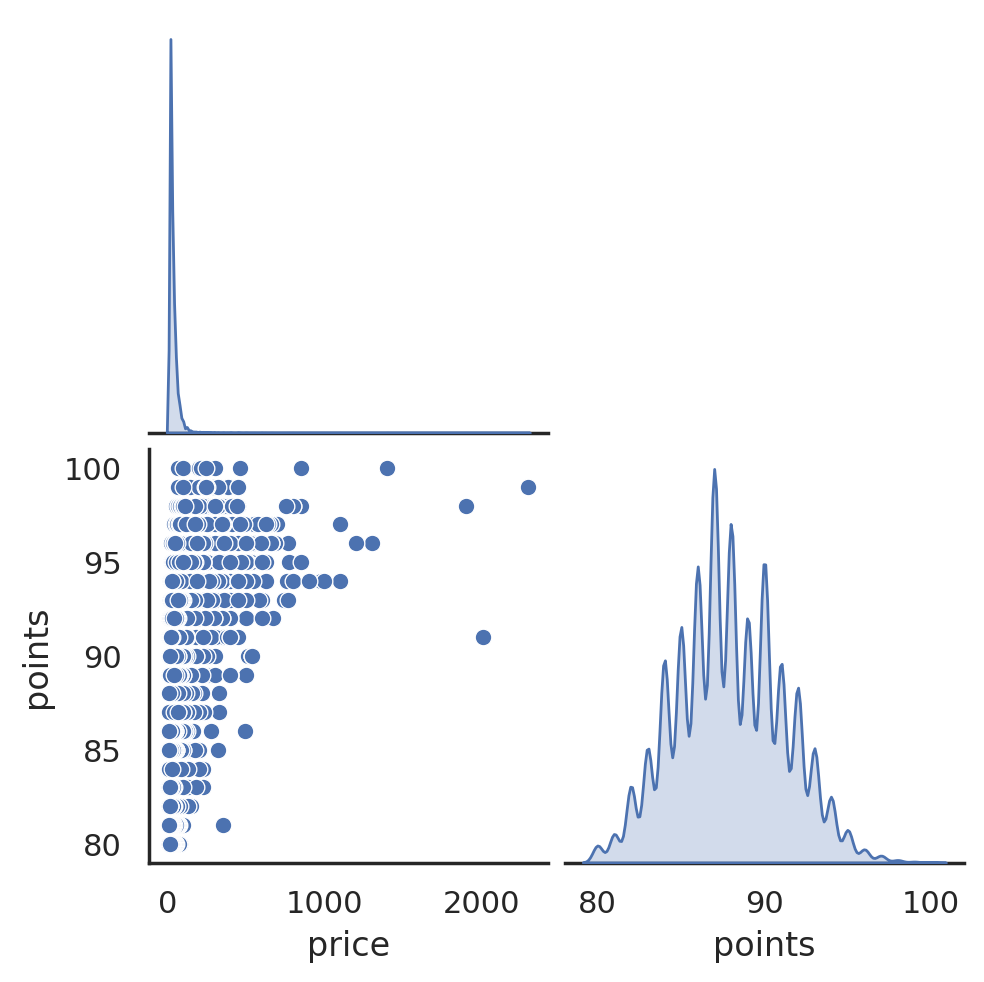

In [270]:
# какая связь связь между ценой на вино и его оценкой?
sns.pairplot(wine[['price', 'points']], corner=True, diag_kind='kde');

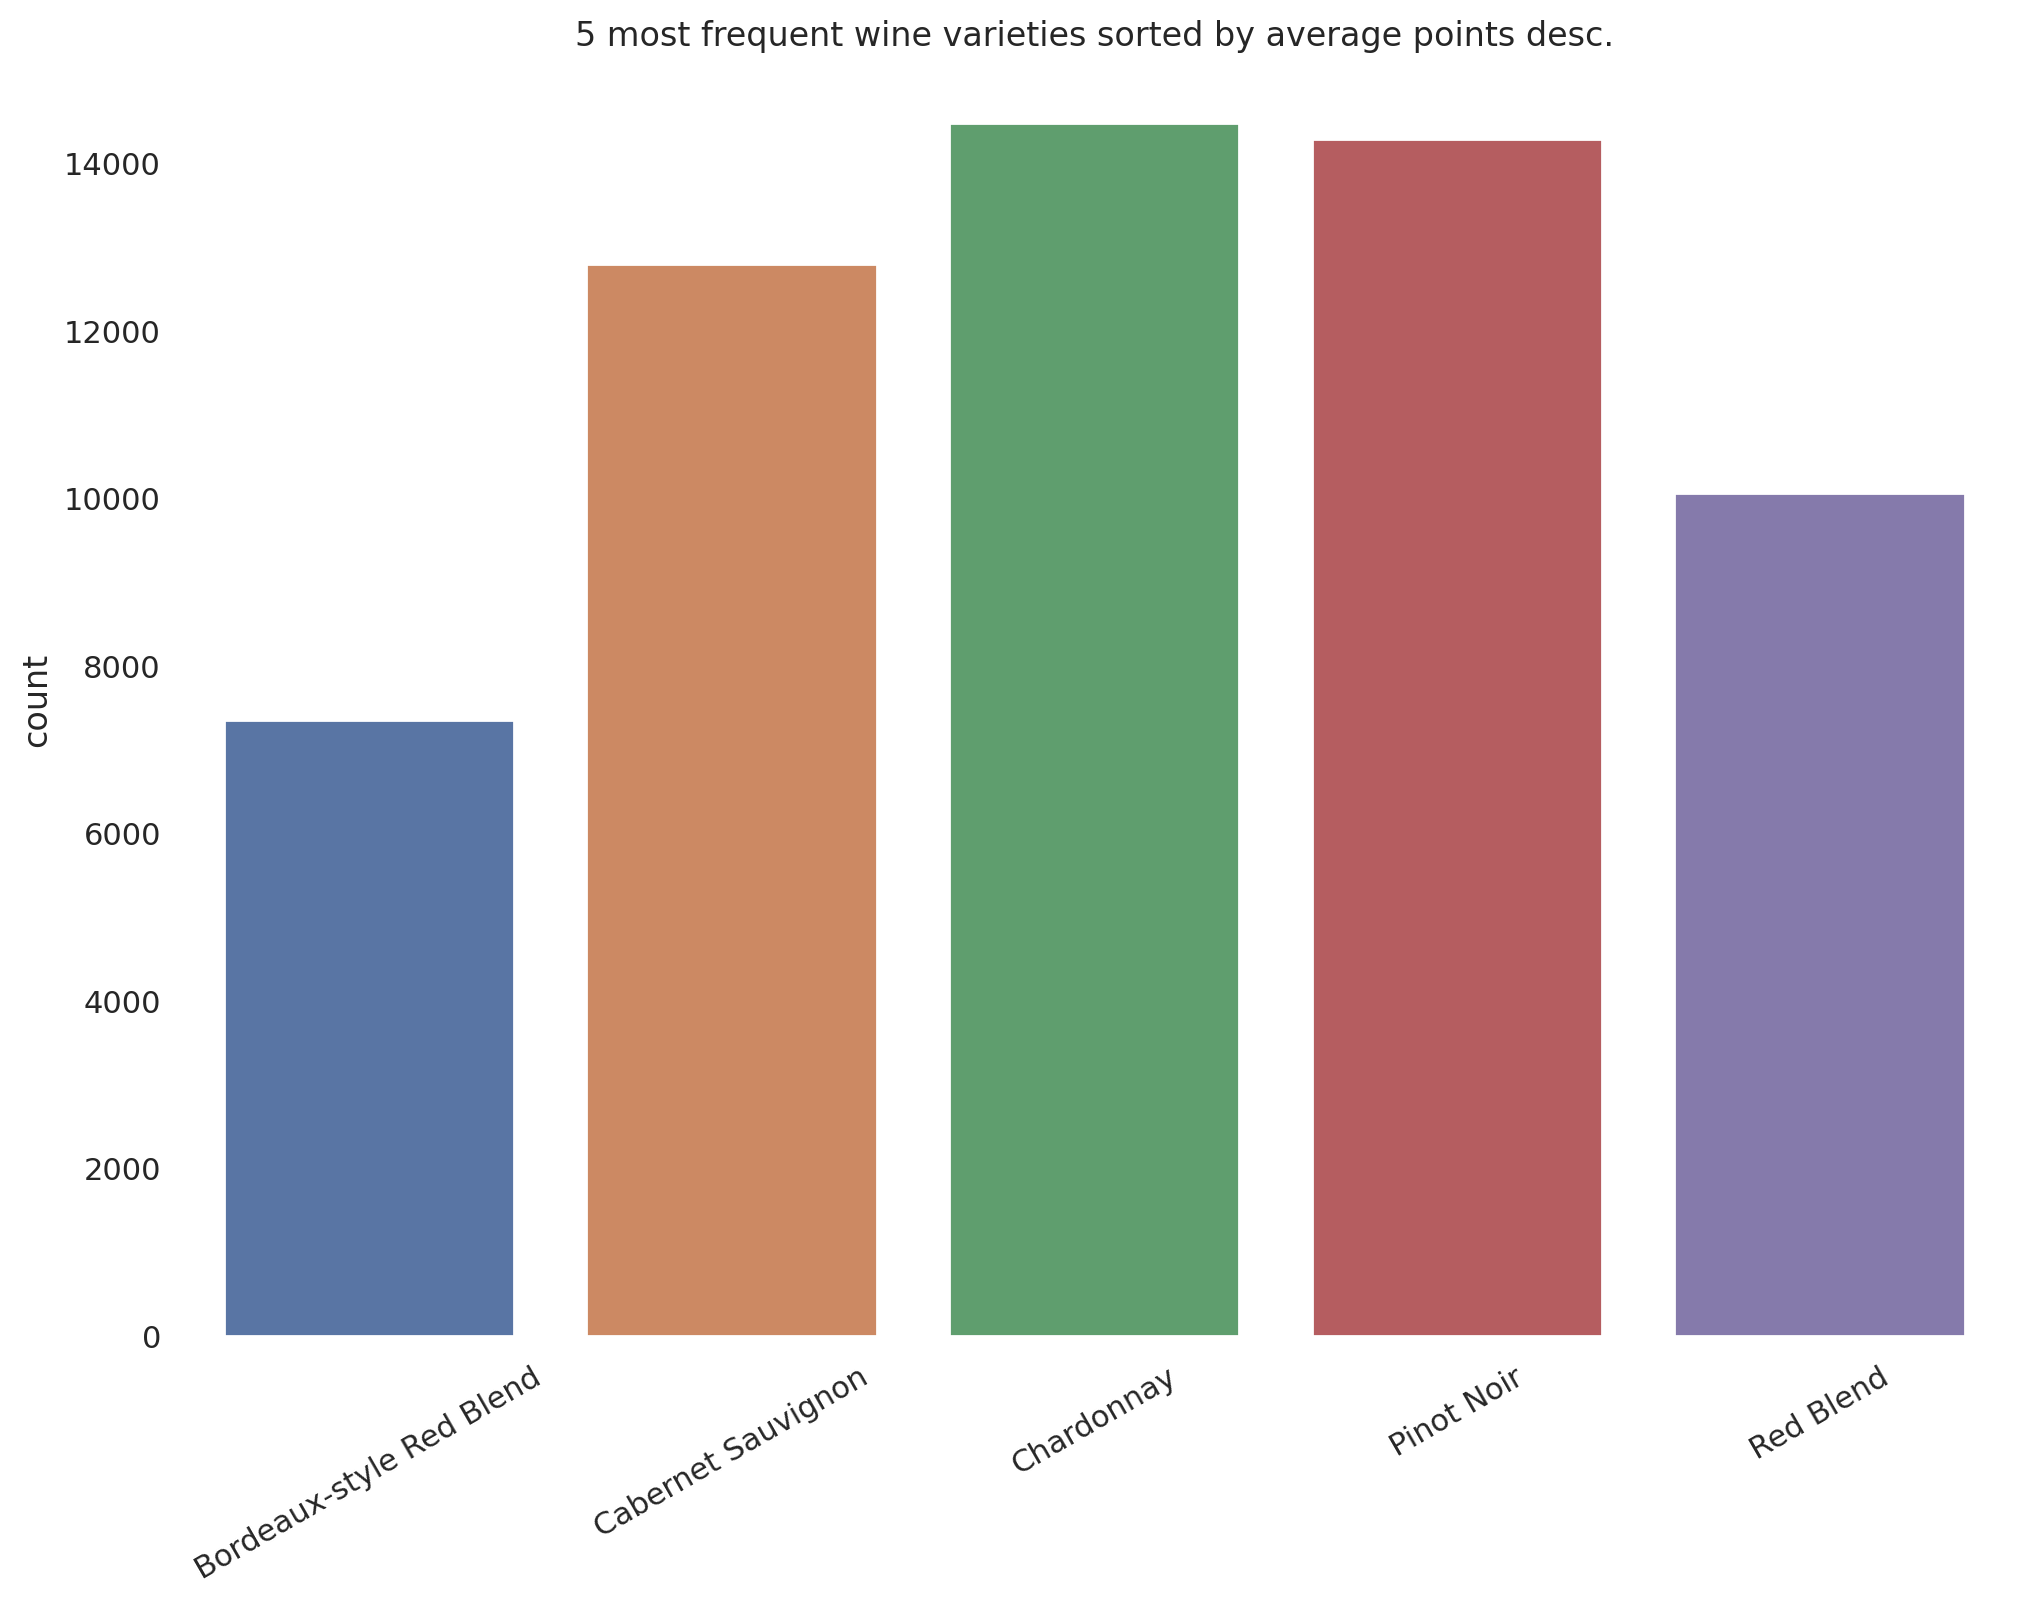

In [224]:
# какие сорта вина (variety) чаще встречаются в датасете и у какого из них лучшие оценки?
sns.set_style('white', rc={'figure.figsize':(11.7,8.27)})
count_varieties = wine.variety.value_counts()[:5]
points = wine.groupby(by='variety').mean().points[count_varieties.index].sort_index()
sns.barplot(x=count_varieties.index, y=count_varieties.values, order=points.index);
plt.title("5 most frequent wine varieties sorted by average points desc.")
sns.despine(bottom = True, left = True, right=True, top=True)
plt.xticks(rotation=30)
plt.ylabel("count")
plt.show()

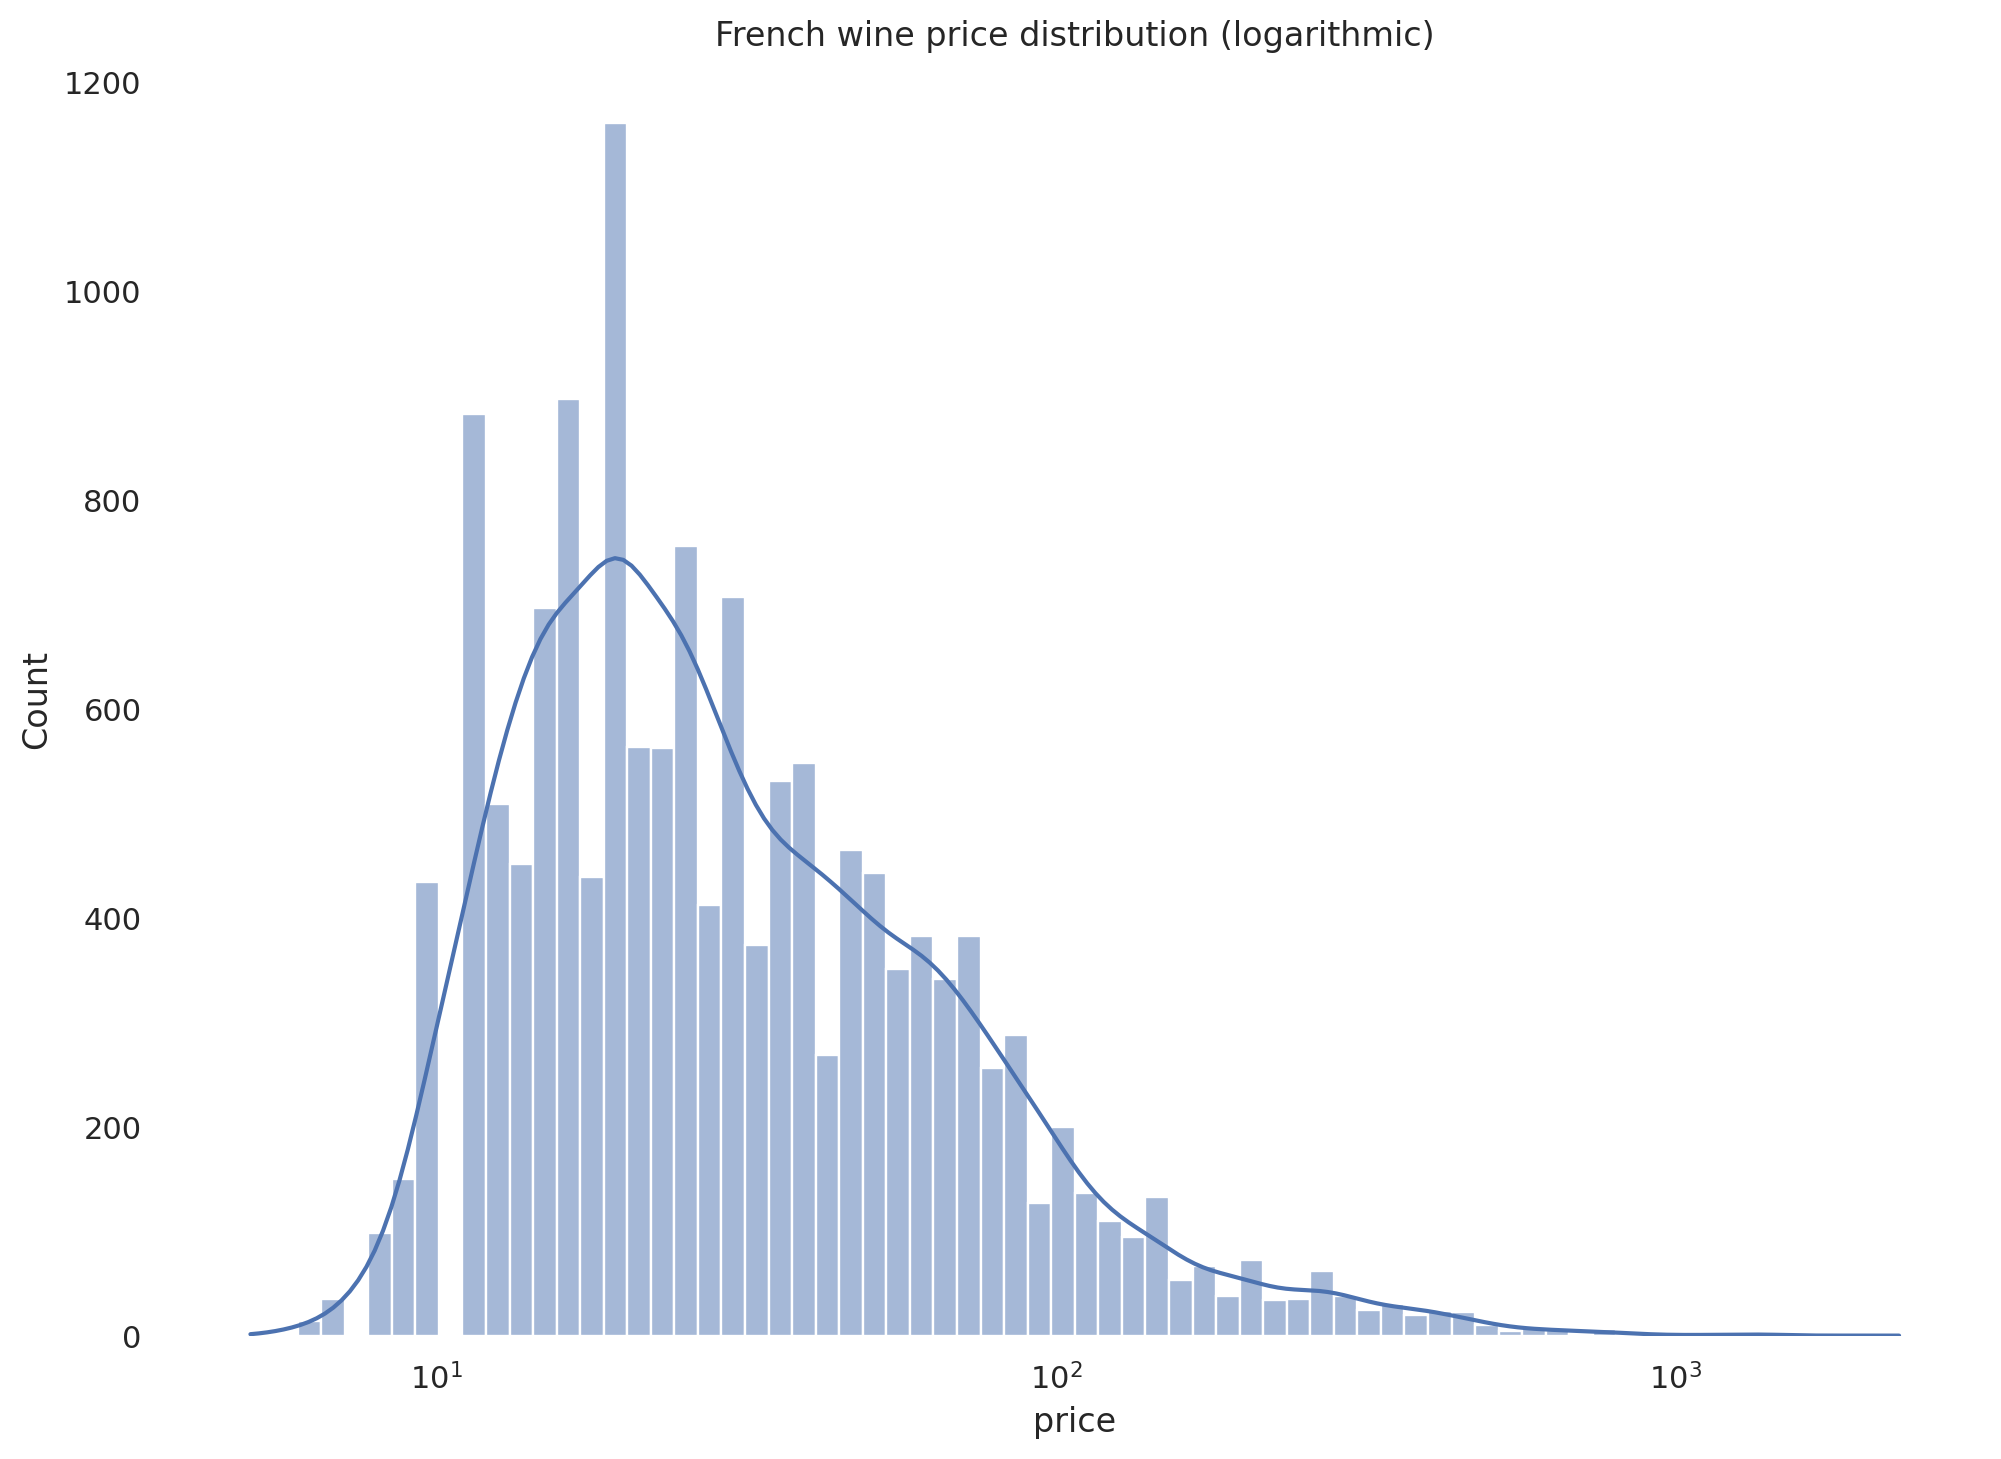

In [220]:
# как распределены цены на французское вино?
sns.histplot(wine[wine.country == 'France'].price, kde=True, log_scale=True);
sns.despine(bottom = True, left = True, right=True, top=True)
plt.title("French wine price distribution (logarithmic)");

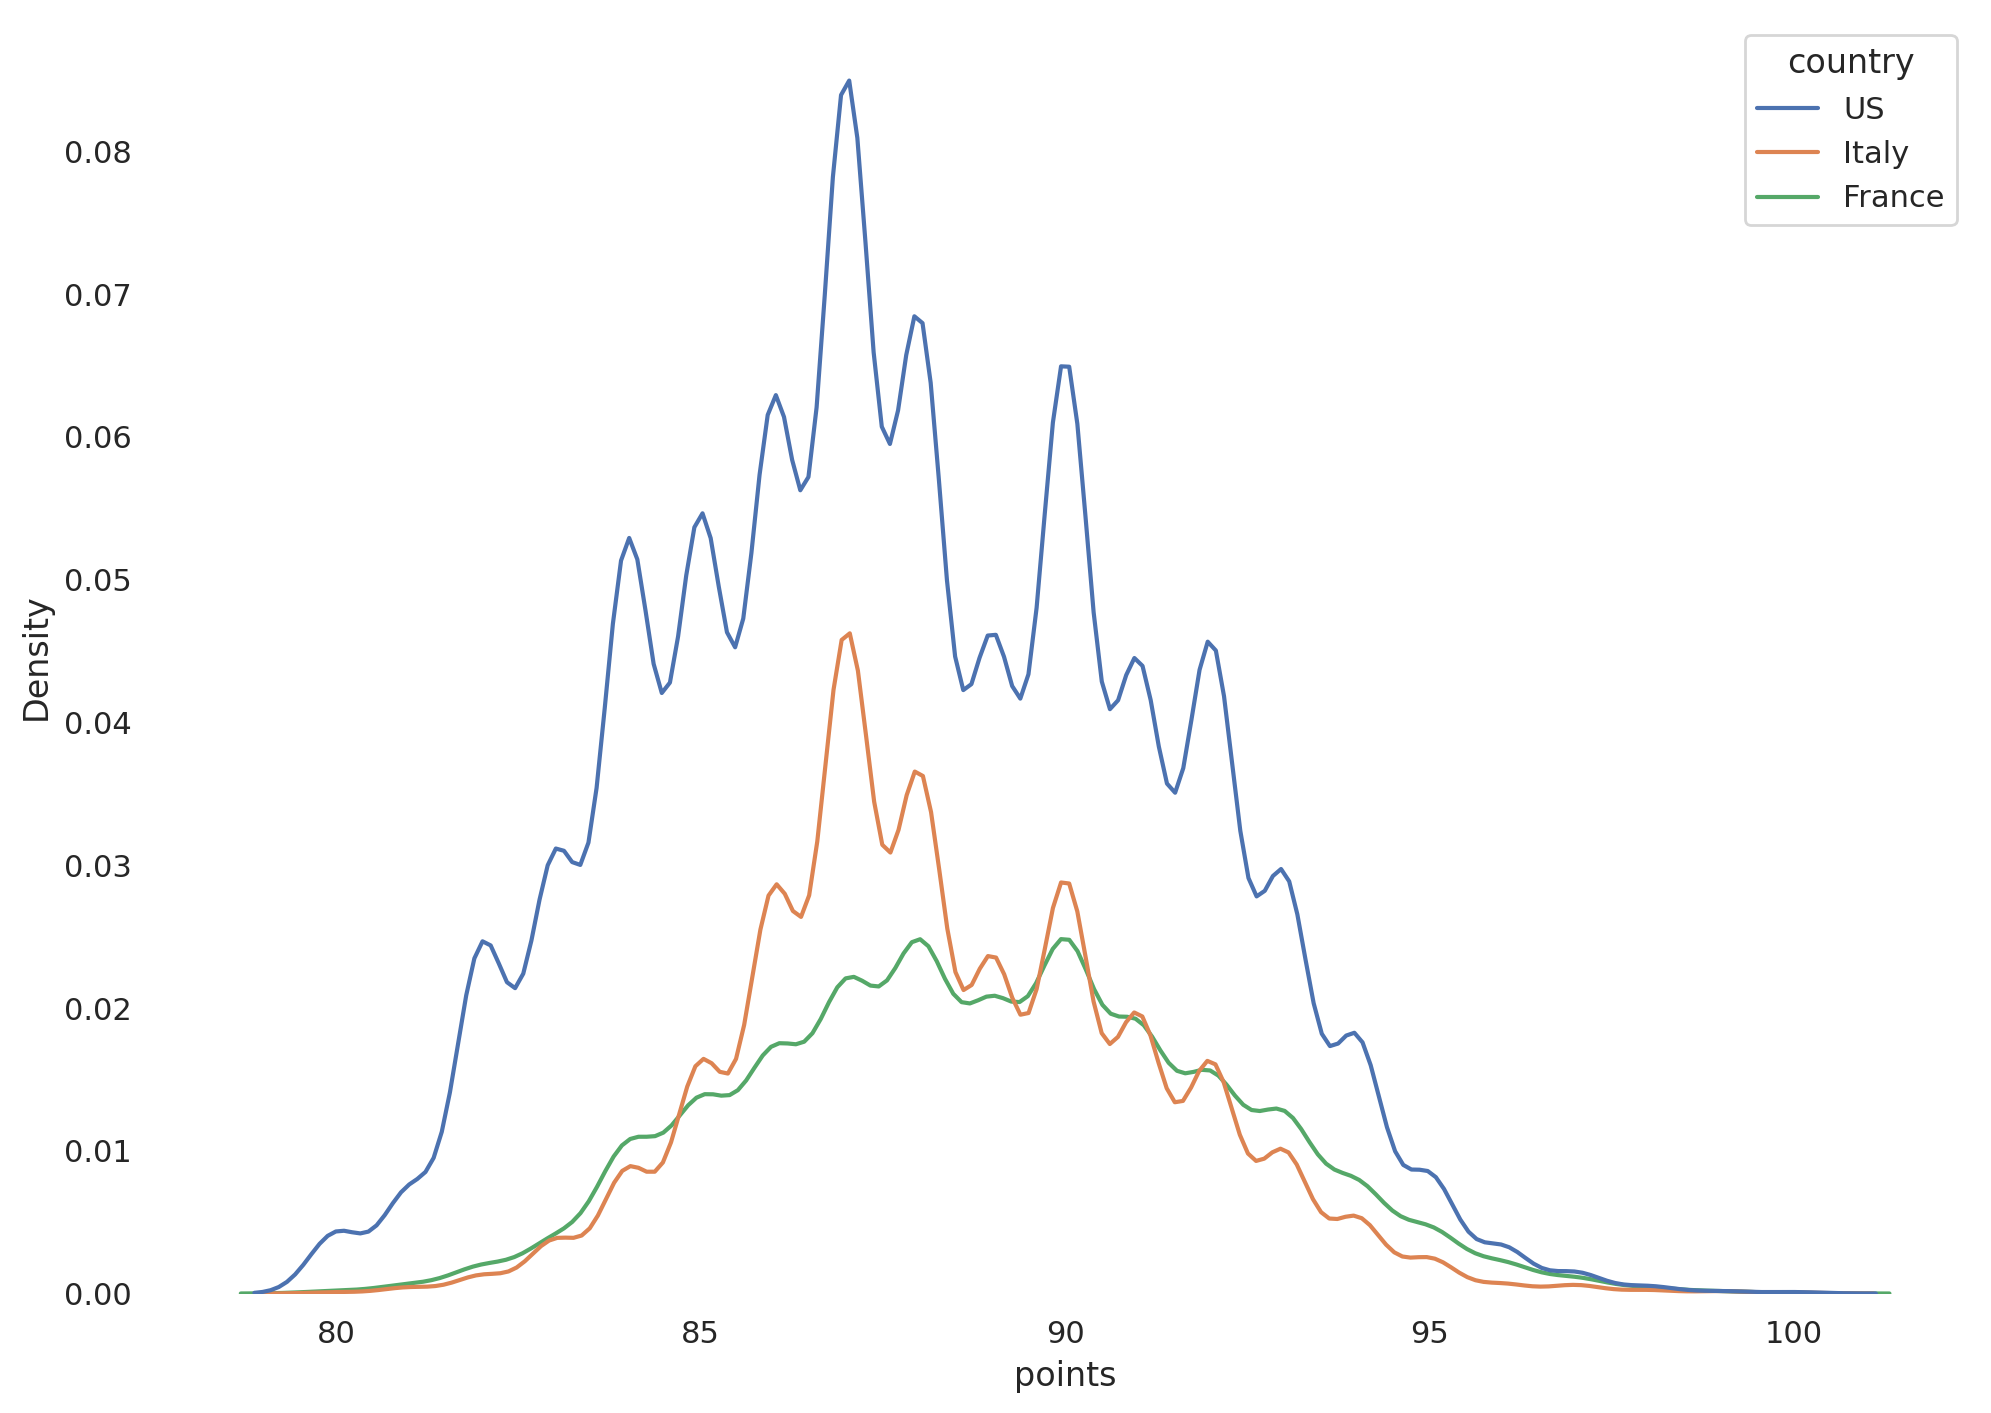

In [255]:
# сравните распределение оценок для трёх самых "винных" стран
most_wine_countries = wine.country.value_counts()[:3]

df = pd.DataFrame()

for country in most_wine_countries.index:
    df = pd.concat([df, wine[wine.country == country]])[['country', 'points']]

sns.kdeplot(data=df, x='points', hue='country');
sns.despine(bottom = True, left = True, right=True, top=True)

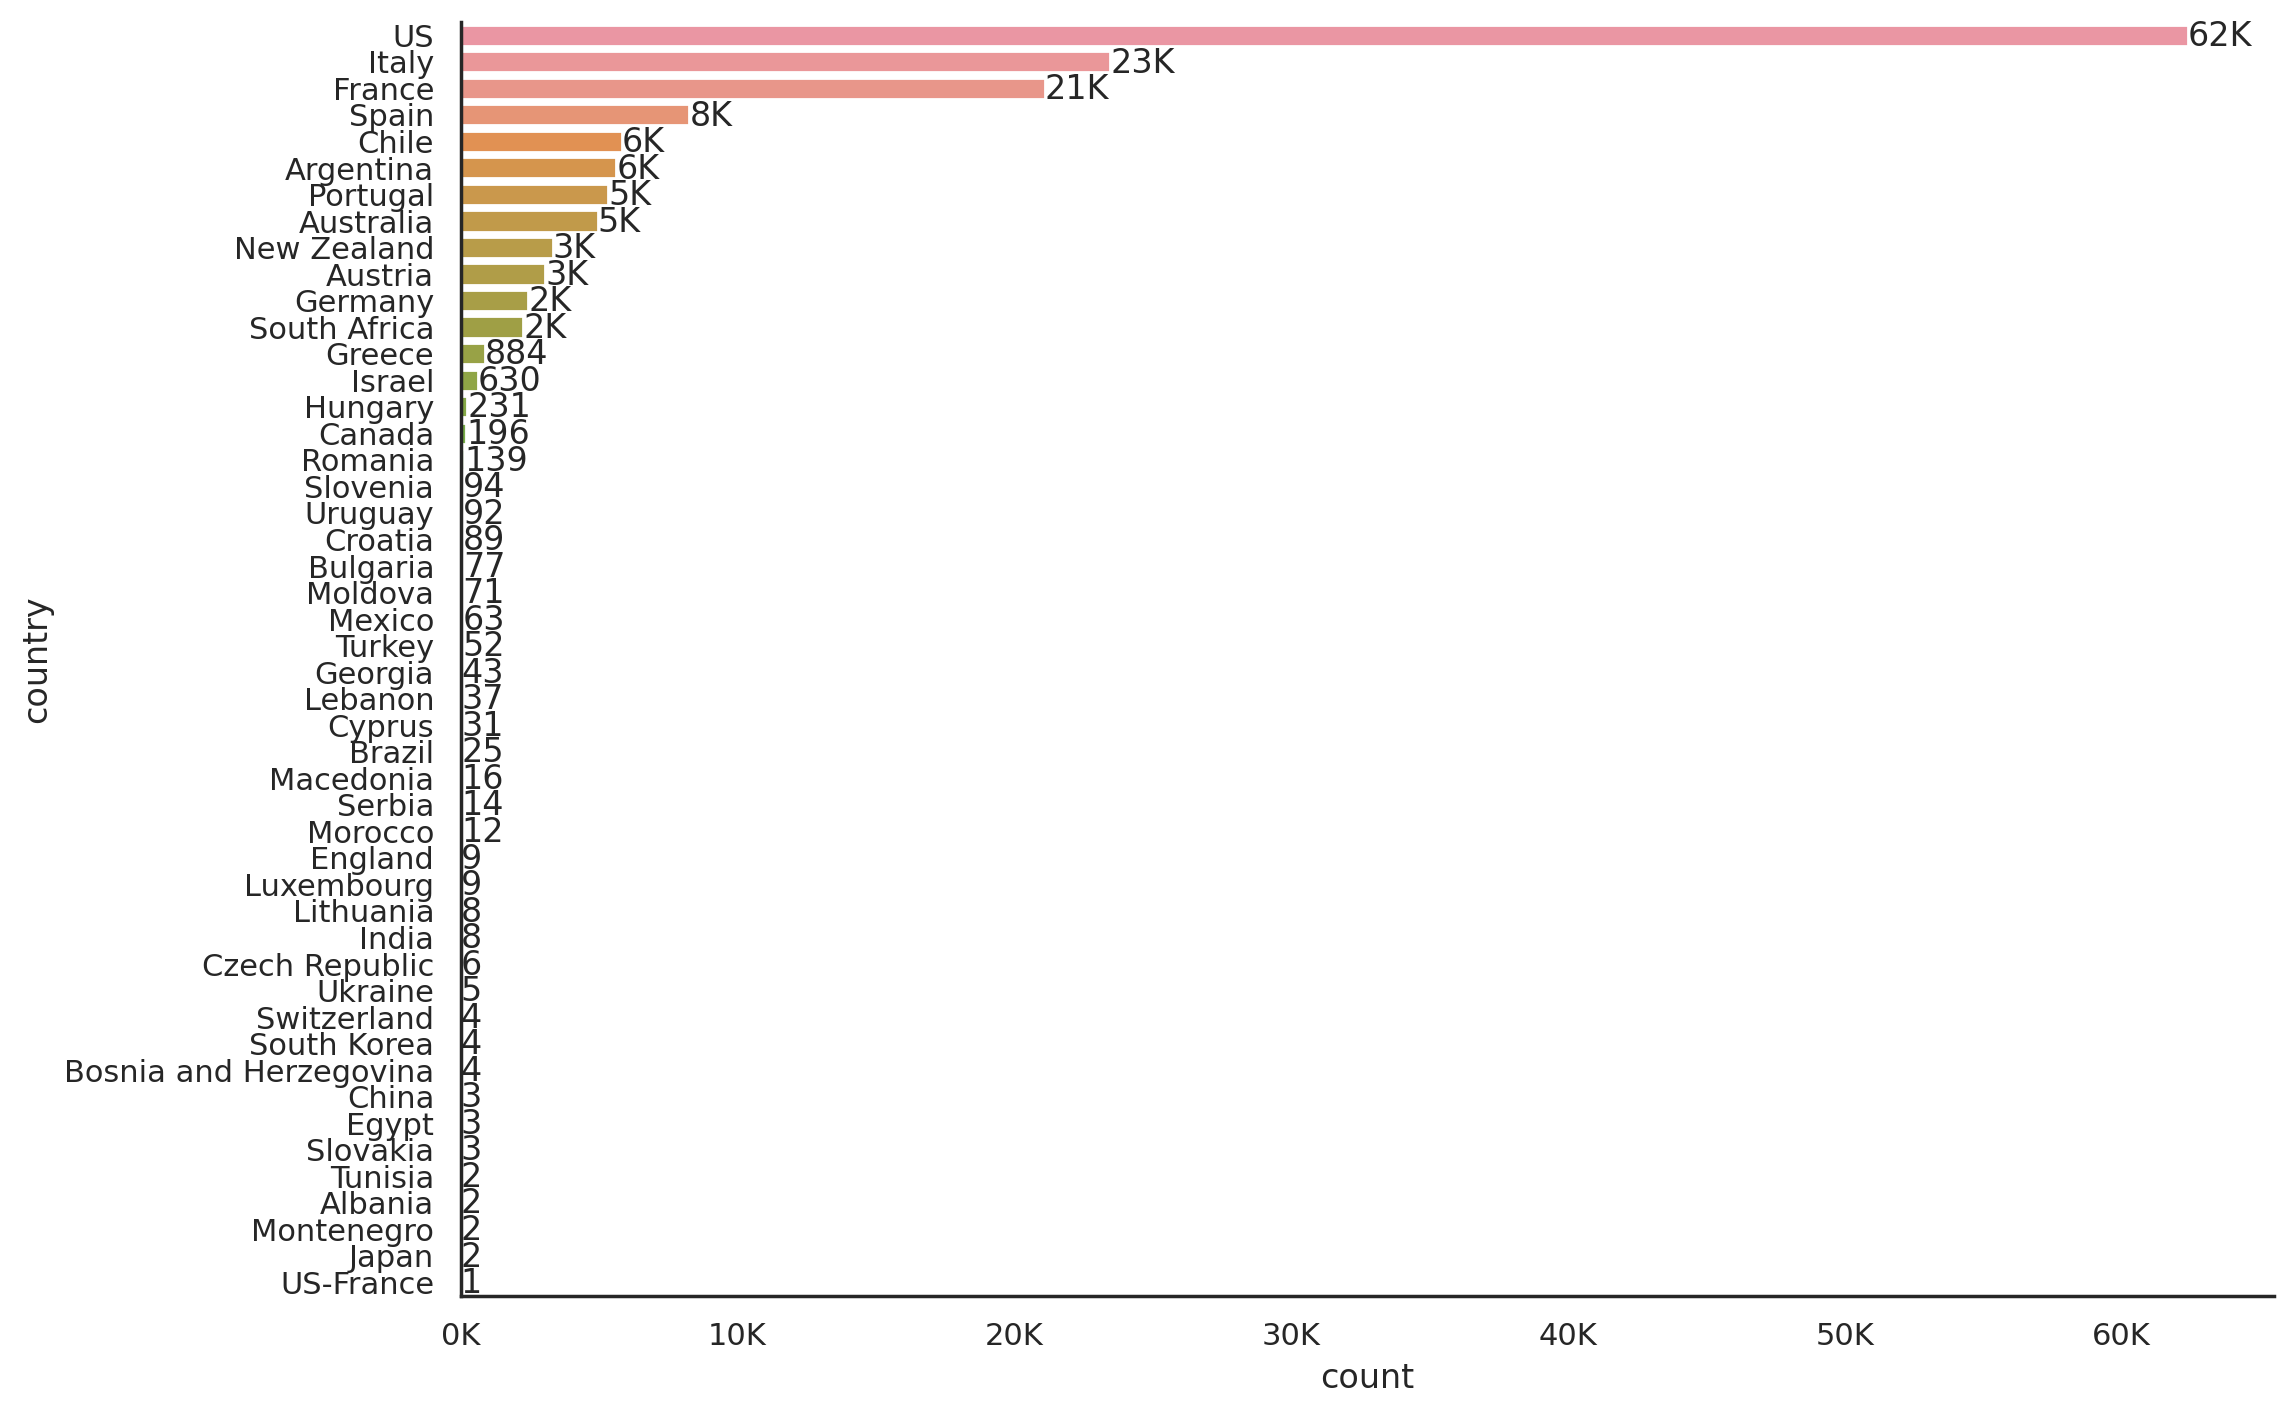

In [305]:
# вино из каких стран имеется в датасете? Оформите график как будто для публики
ax = sns.countplot(data=wine,
                   y='country', 
                   orient='h',
                   order=wine.country.value_counts().index,
                   dodge=False);

xlabels = ['{:,.0f}'.format(x/1000) + 'K' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels);
sns.despine()

for p in ax.patches:
    percentage = '{:,.0f}'.format(p.get_width() / 1000) + 'K' if p.get_width() > 1000 else '{:,.0f}'.format(p.get_width())
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width
    y = p.get_y() + height
    ax.annotate(percentage,(x,y))

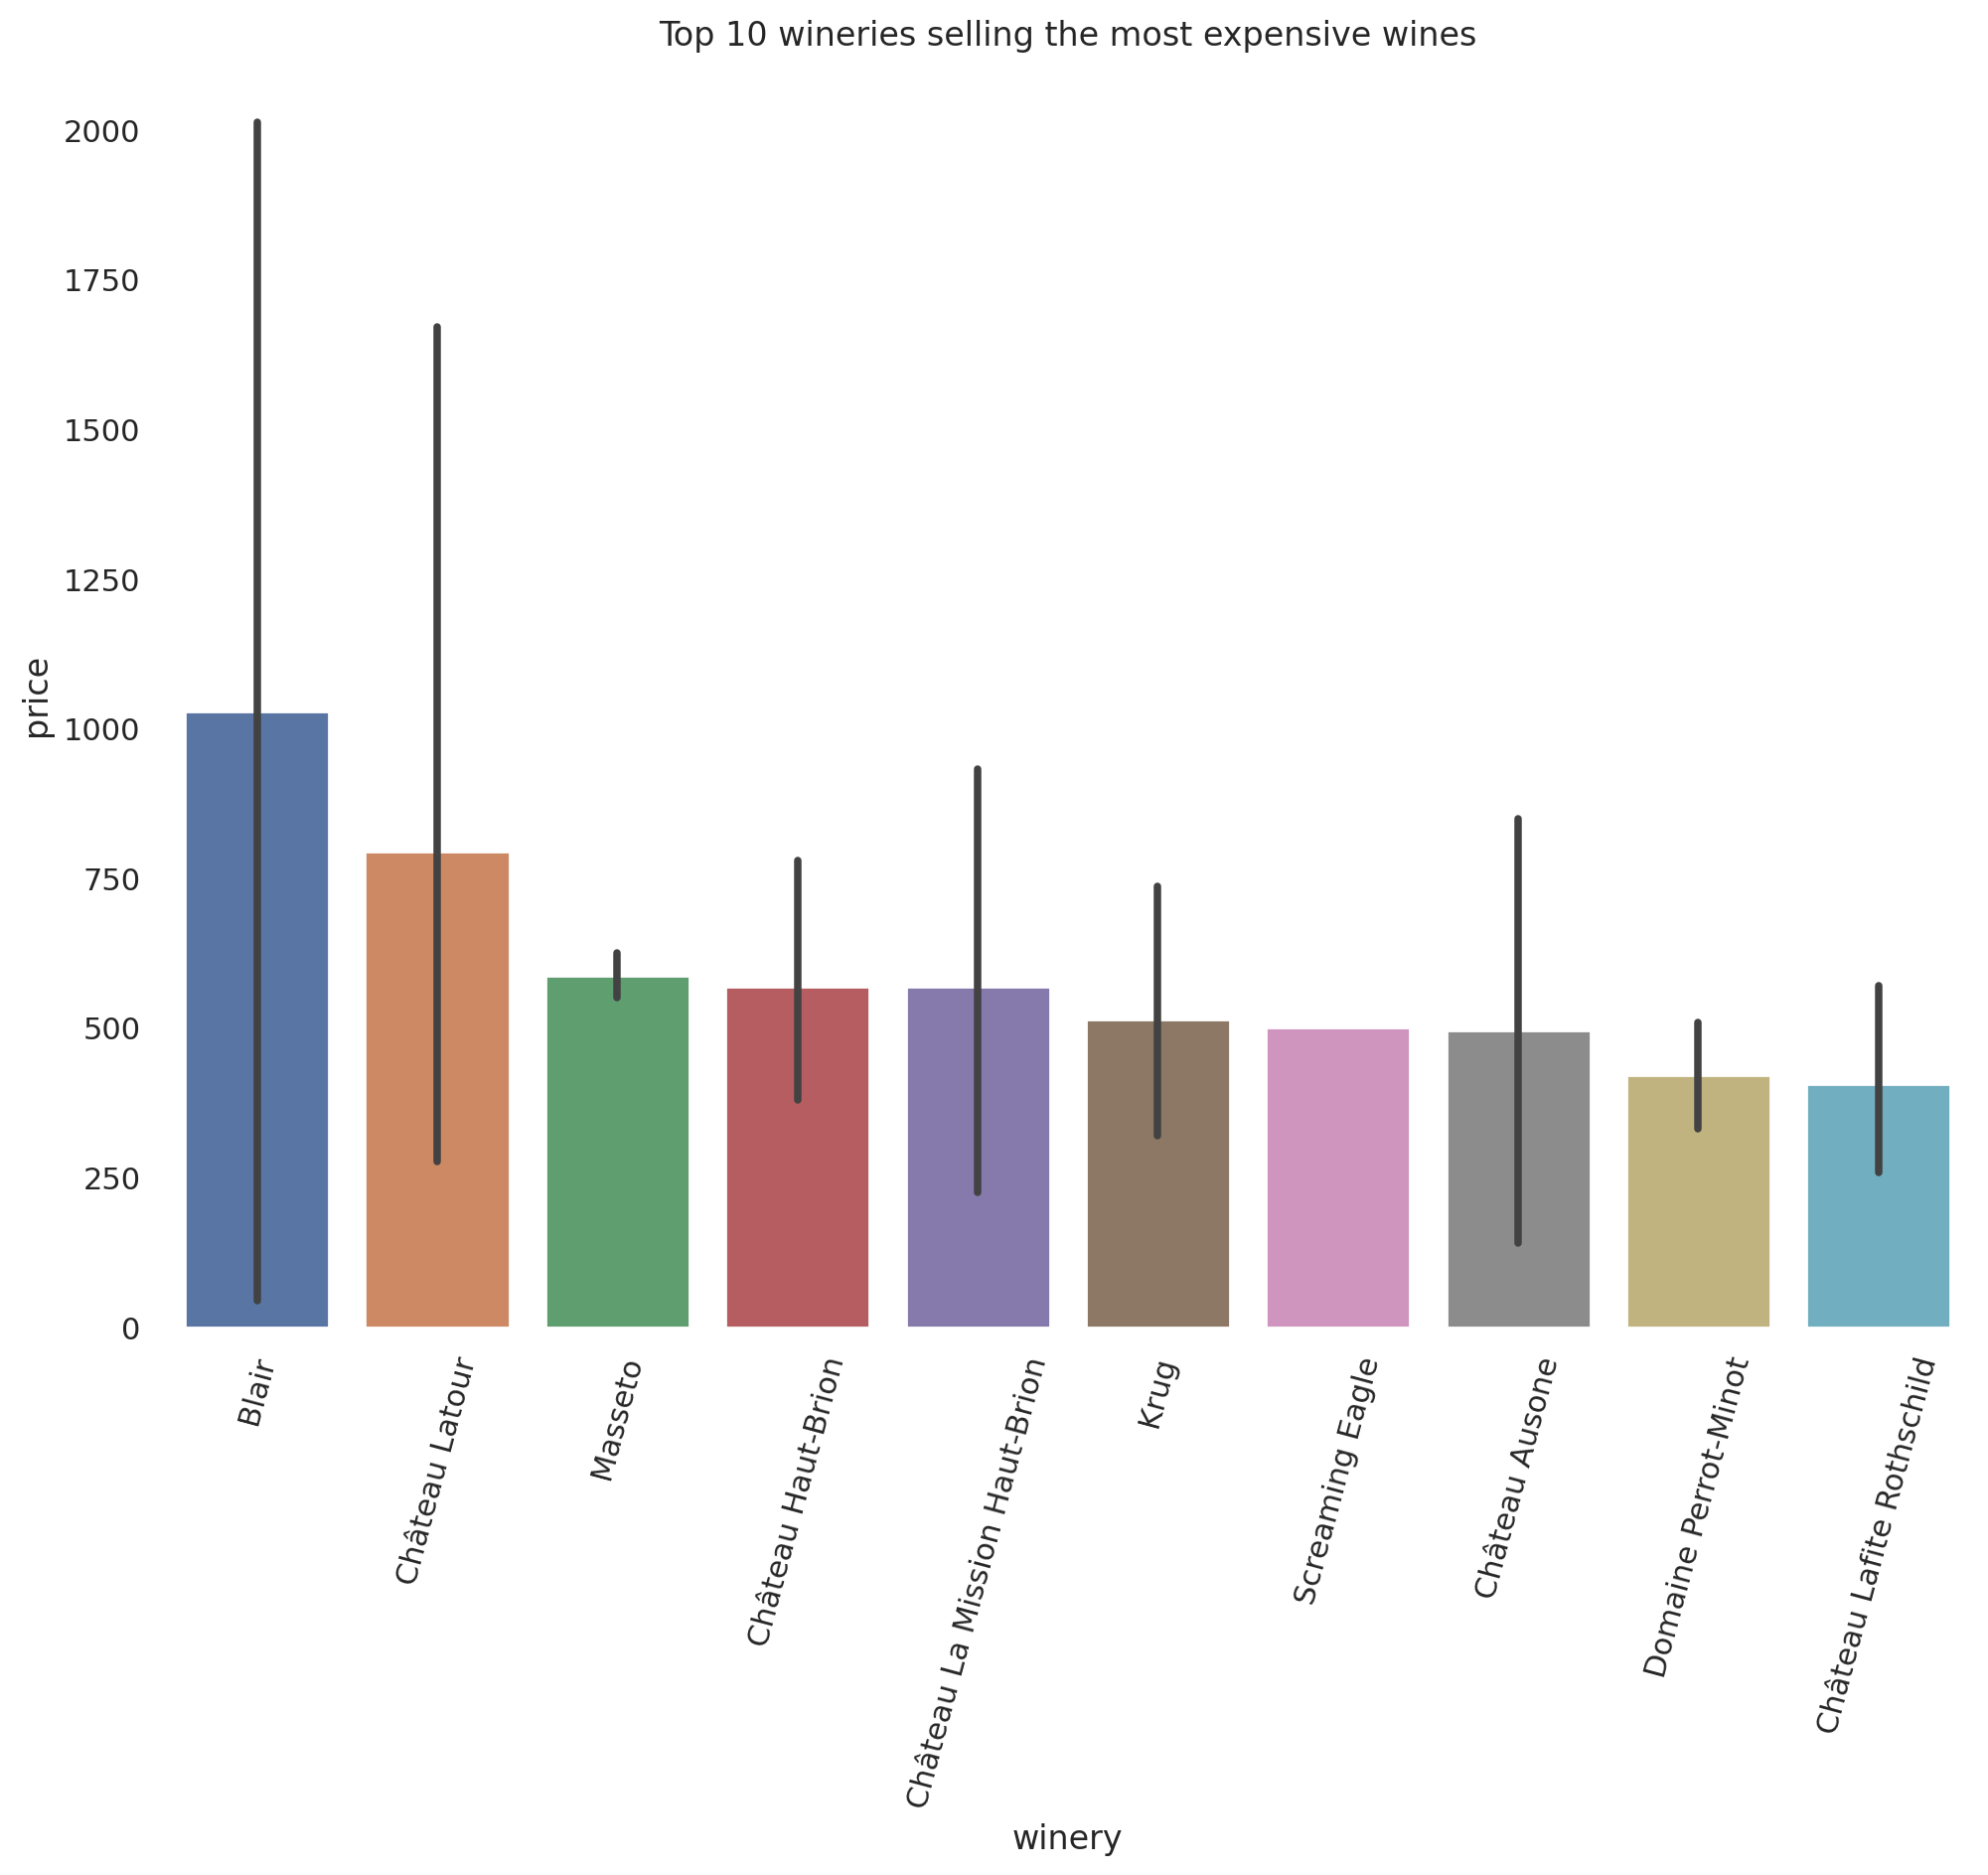

In [322]:
# какие винодельни продают самое дорогое вино?
best_wineries = wine.groupby(by='winery').mean().sort_values(by='price')[::-1].dropna()['price'][:10].index

df = pd.DataFrame()

for winery in best_wineries:
    df = pd.concat([df, wine[wine.winery == winery]])[['price', 'winery']]
    
sns.barplot(data=df, y='price', x='winery', estimator='mean');
plt.xticks(rotation=75);
plt.title("Top 10 wineries selling the most expensive wines")
sns.despine(bottom = True, left = True, right=True, top=True)